<h1>Importing Modules</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Oversampling
from imblearn.over_sampling import SMOTE

# ML Libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Encoding
from category_encoders import TargetEncoder

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set visualization style
plt.style.use('ggplot')  # Modern and clean style
sns.set_palette('pastel')  # Soft color palette
# %matplotlib inline

<h1>Loading Data</h1>

In [3]:
# Load datasets (replace with your actual file paths)
train_path = "train.csv"  
test_path = "test.csv"    

In [4]:
try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Data loaded successfully


In [5]:
print("\n=== Data Overview ===")
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print("\nTraining data sample:")
# display(train_df.head(3))


=== Data Overview ===
Training data shape: (17996, 17)
Test data shape: (7713, 16)

Training data sample:


In [6]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [7]:
train_df.nunique()

Artist Name            9149
Track Name            15129
Popularity              100
danceability            909
energy                 1208
key                      11
loudness               9002
mode                      2
speechiness            1194
acousticness           3930
instrumentalness       4253
liveness               1459
valence                1320
tempo                 13562
duration_in min/ms    14121
time_signature            4
Class                    11
dtype: int64

<h1>Data Preprocessing For Train</h1>

In [8]:
print("Removing Duplicates:")
print("Duplicate values in train_df: ",train_df.duplicated().sum())
if(train_df.duplicated().sum()>0):
    train_df.drop_duplicates(inplace=True)
    train_df.reset_index(drop=True,inplace=True)

Removing Duplicates:
Duplicate values in train_df:  0


In [9]:
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['Artist Name', 'Track Name']
print("\nNumerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class']
Categorical features: ['Artist Name', 'Track Name']


In [10]:
# Print number of missing values in each feature
print("\nMissing values in train_df:")
print(train_df.isnull().sum())
print("\nMissing values in test_df:")
print(test_df.isnull().sum())


Missing values in train_df:
Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Missing values in test_df:
Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64


In [11]:
#filling the missing values for numerical features 
from sklearn.impute import SimpleImputer
# Impute missing values
target="Class"
train_df = train_df.copy()
test_df = test_df.copy()
num_feats_not_target = [col for col in numerical_features if col != target]
imputer = SimpleImputer(strategy="median")
train_df[numerical_features] = imputer.fit_transform(train_df[numerical_features])
test_df[num_feats_not_target]=imputer.fit_transform(test_df[num_feats_not_target])

In [12]:
print(f"imputation results::")
print(f"Train missing values after imputation:\n{train_df[numerical_features].isnull().sum()}")
print(f"Test missing values after imputation:\n{test_df[num_feats_not_target].isnull().sum()}")

imputation results::
Train missing values after imputation:
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64
Test missing values after imputation:
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64


<h1>EDA analysis</h1>


=== Starting Exploratory Data Analysis ===


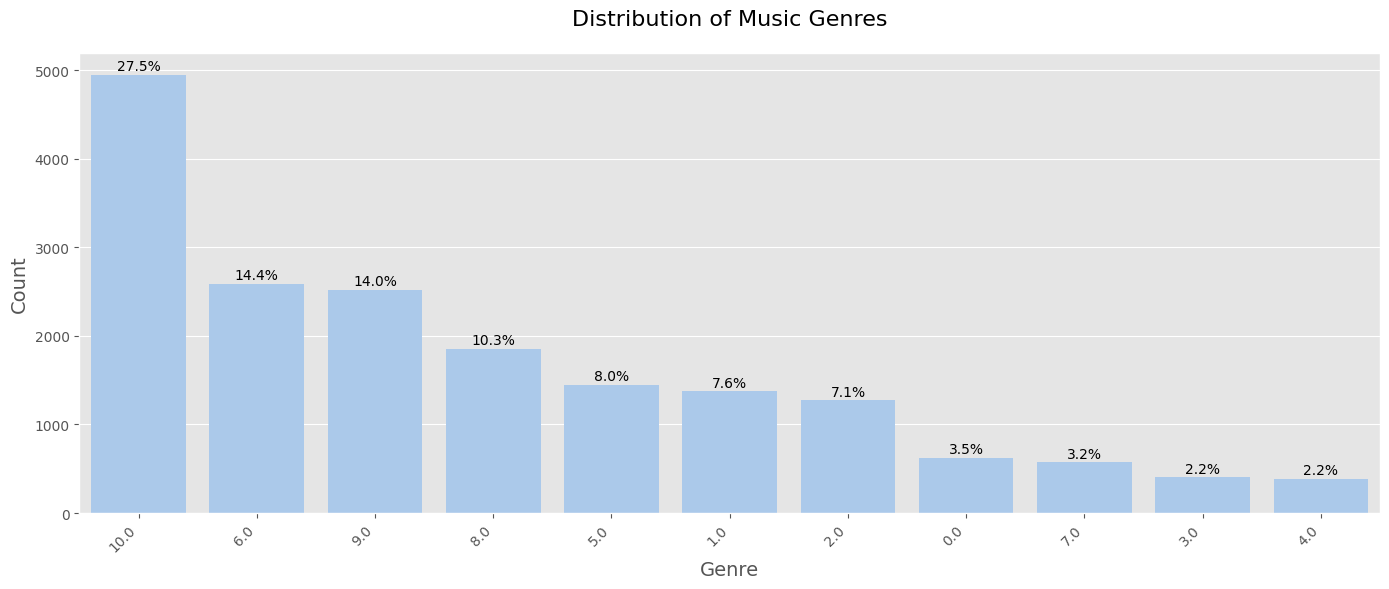

In [13]:
print("\n=== Starting Exploratory Data Analysis ===")

# 5.1 Genre Distribution
plt.figure(figsize=(14,6))
ax = sns.countplot(data=train_df, x='Class', order=train_df['Class'].value_counts().index)

plt.title('Distribution of Music Genres', fontsize=16, pad=20)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add percentage labels
total = len(train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,
            f'{height/total:.1%}',
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()



=== Feature Distributions ===


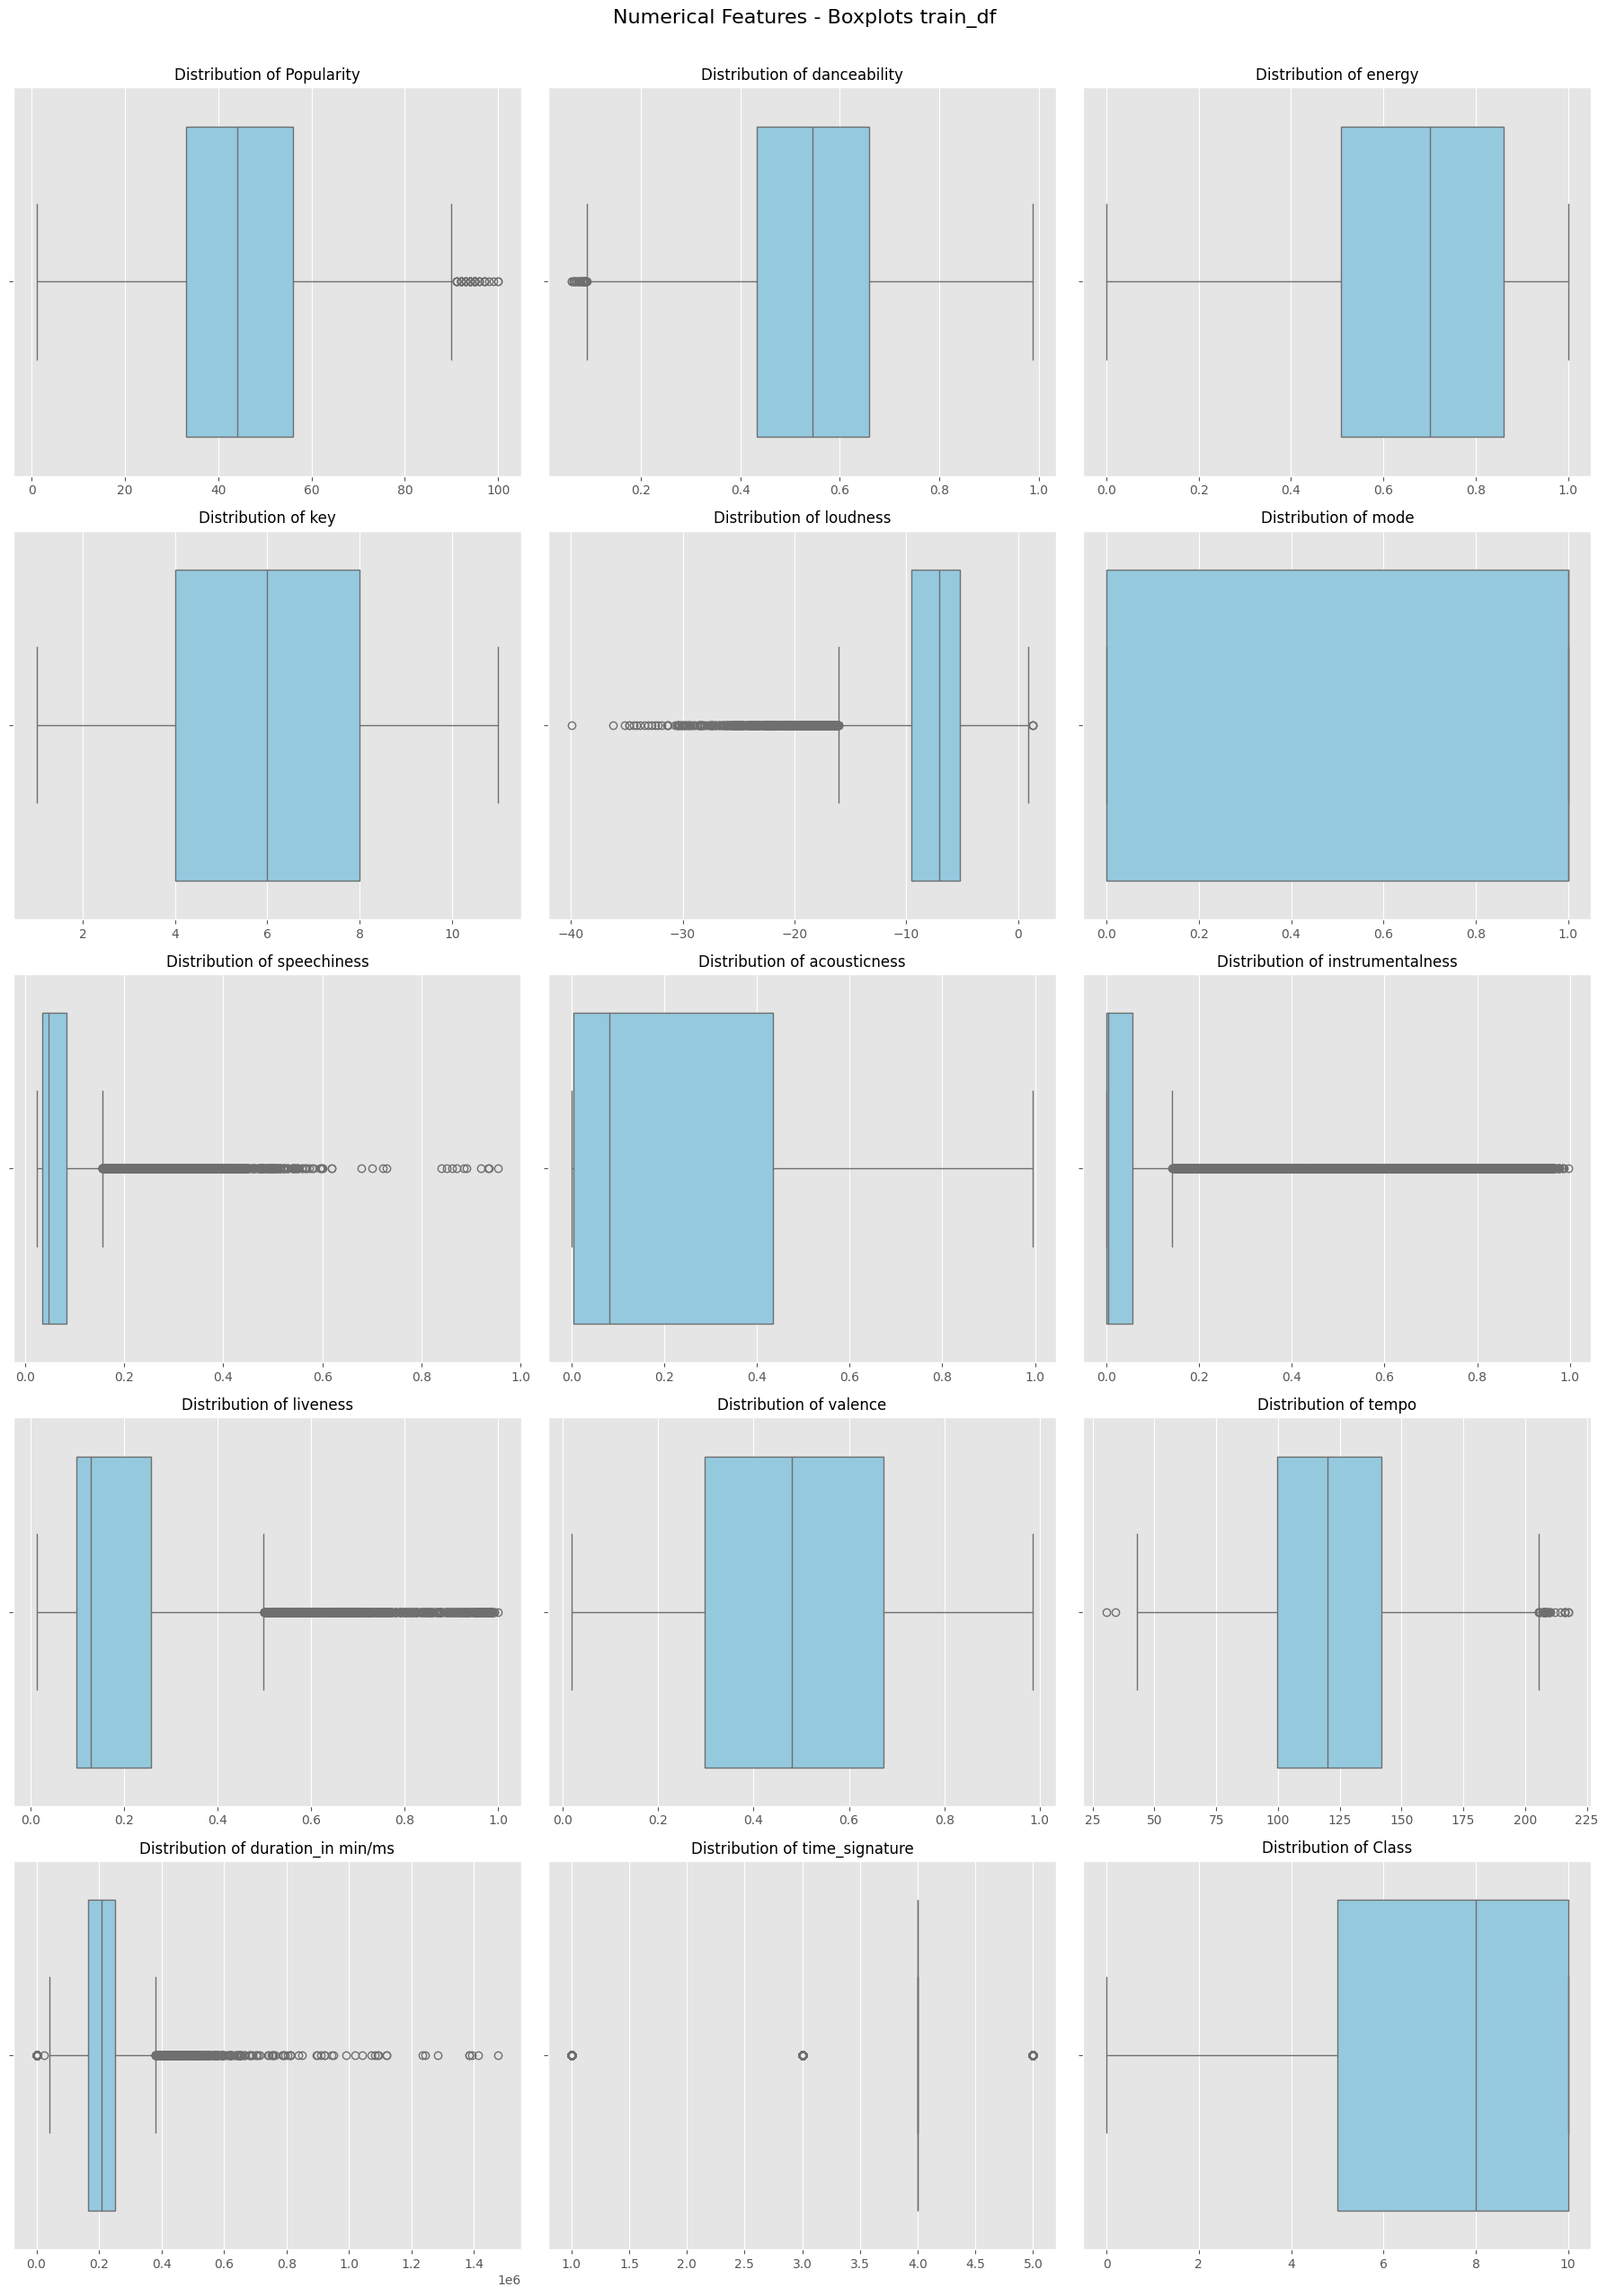

************************************************** Test Boxplot **************************************************


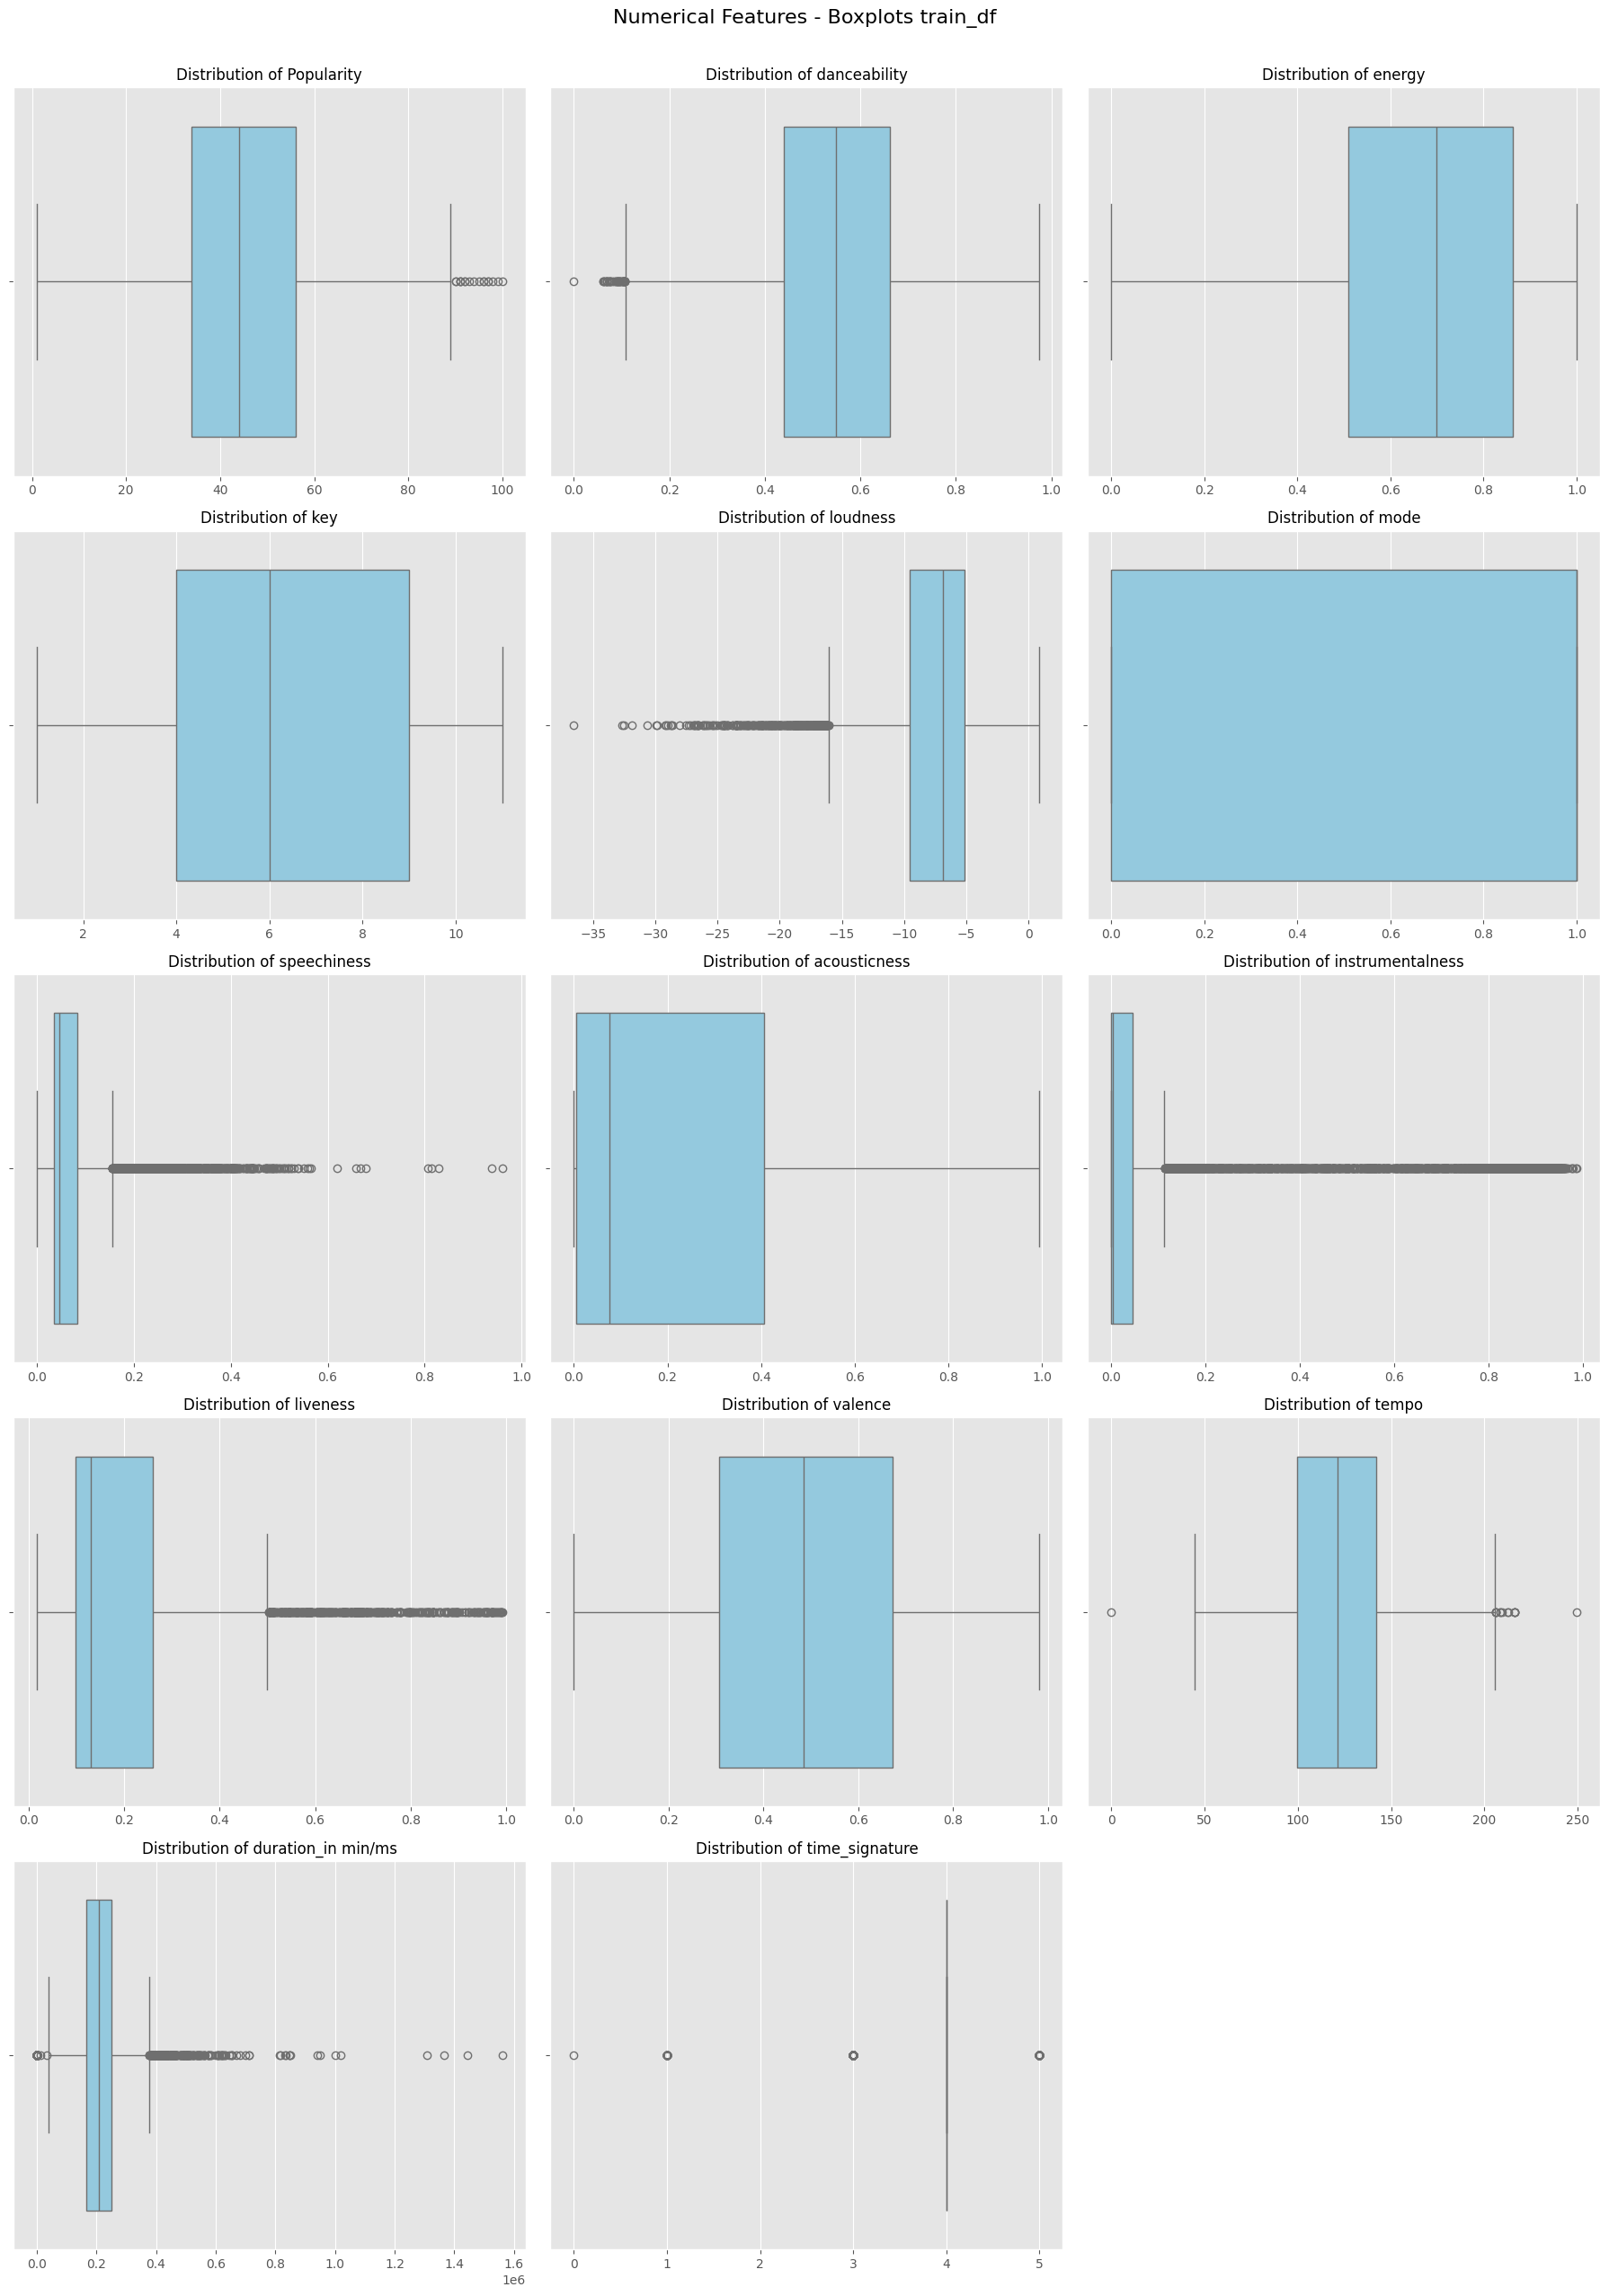

In [14]:
# 5.2 Feature Distributions of numerical features
print("\n=== Feature Distributions ===")

# Create subplots for numerical features
n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))

# Boxplots
plt.figure(figsize=(18, 5*n_rows))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('Numerical Features - Boxplots train_df', y=1.02, fontsize=16)
plt.show()

n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))
print("**"*25,"Test Boxplot","**"*25)
# Boxplots
plt.figure(figsize=(18, 5*n_rows))
for i, col in enumerate(num_feats_not_target, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=test_df[col], color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('Numerical Features - Boxplots train_df', y=1.02, fontsize=16)
plt.show()


<h2>Replacing Outliers</h2>

In [15]:
#Handling outliers using z-score

#Replace outliers using Z-score with median
continuous_features = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                       'valence', 'tempo', 'duration_in min/ms', 'time_signature']

z_scores = np.abs((train_df[continuous_features] - train_df[continuous_features].mean()) /
                  train_df[continuous_features].std())

for feature in continuous_features:
    median_val = train_df[feature].median()
    train_df.loc[z_scores[feature] > 3, feature] = median_val



=== Feature Distributions ===


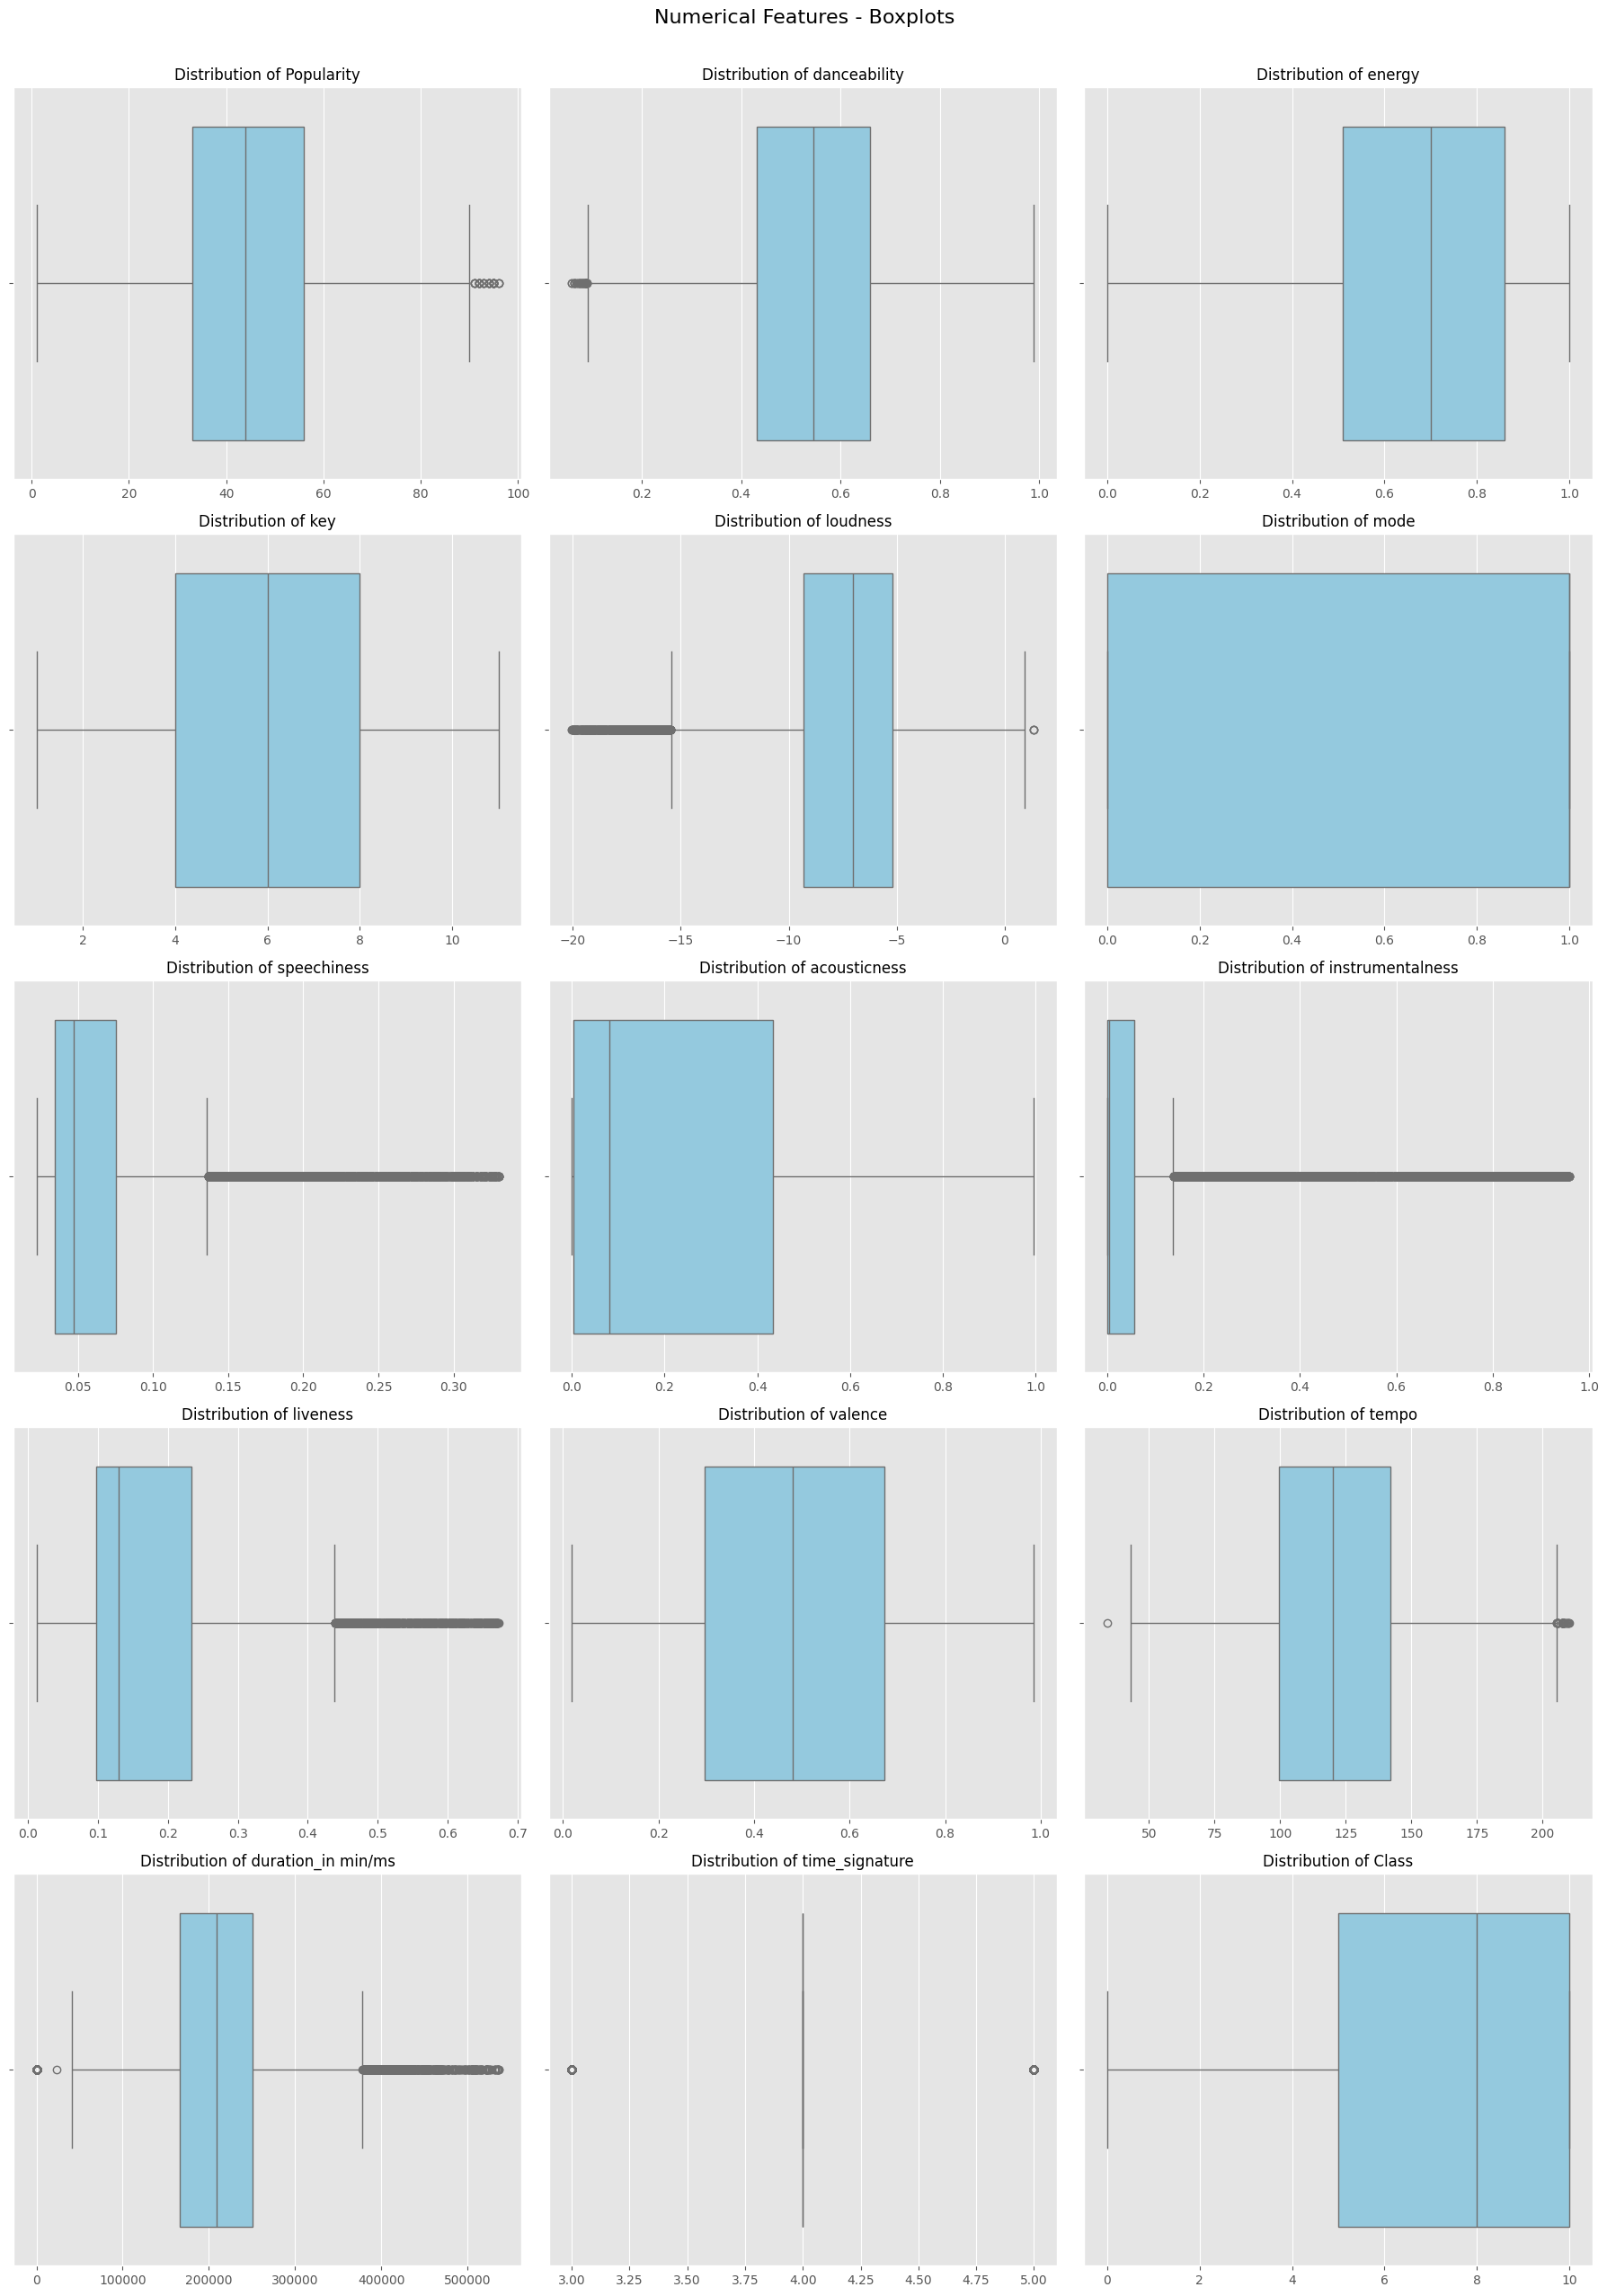

In [16]:
# 5.2 Feature Distributions
print("\n=== Feature Distributions ===")

# Create subplots for numerical features
n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))

# Boxplots
plt.figure(figsize=(18, 5*n_rows))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('Numerical Features - Boxplots', y=1.02, fontsize=16)
plt.show()


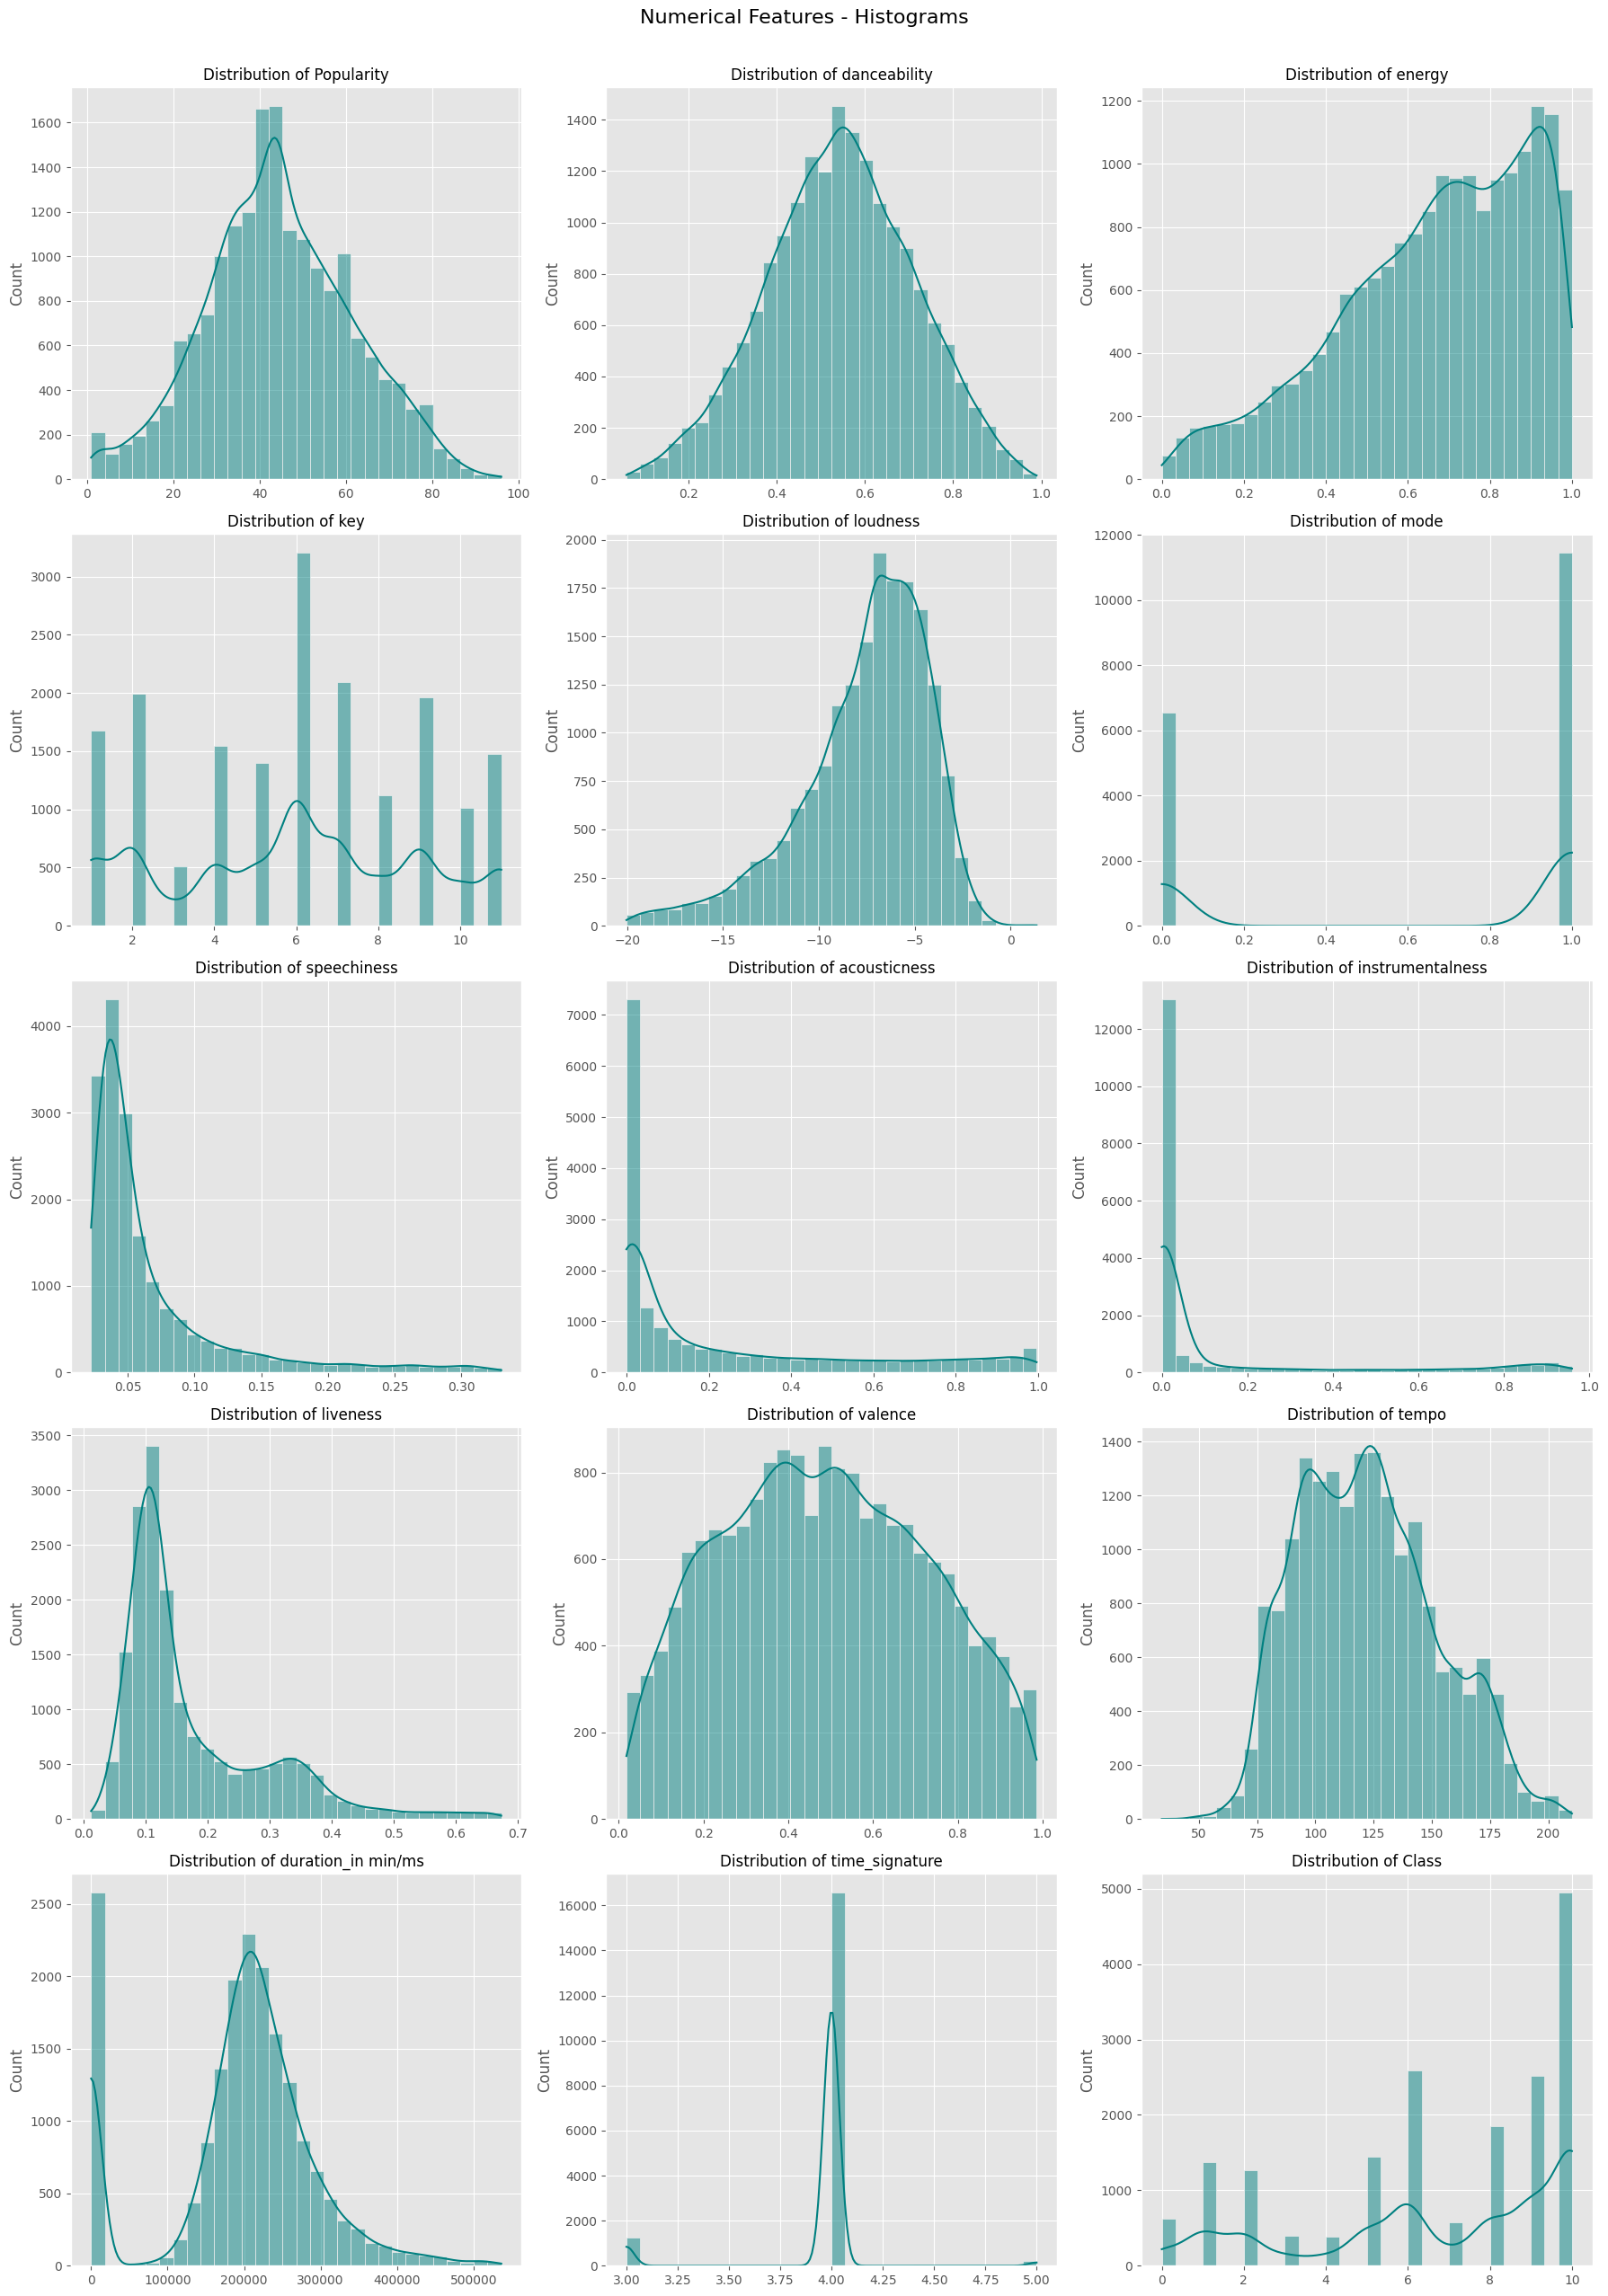

In [17]:
# Histograms
plt.figure(figsize=(18, 5*n_rows))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(train_df[col], bins=30, kde=True, color='teal')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('Numerical Features - Histograms', y=1.02, fontsize=16)
plt.show()



=== Correlation Analysis ===


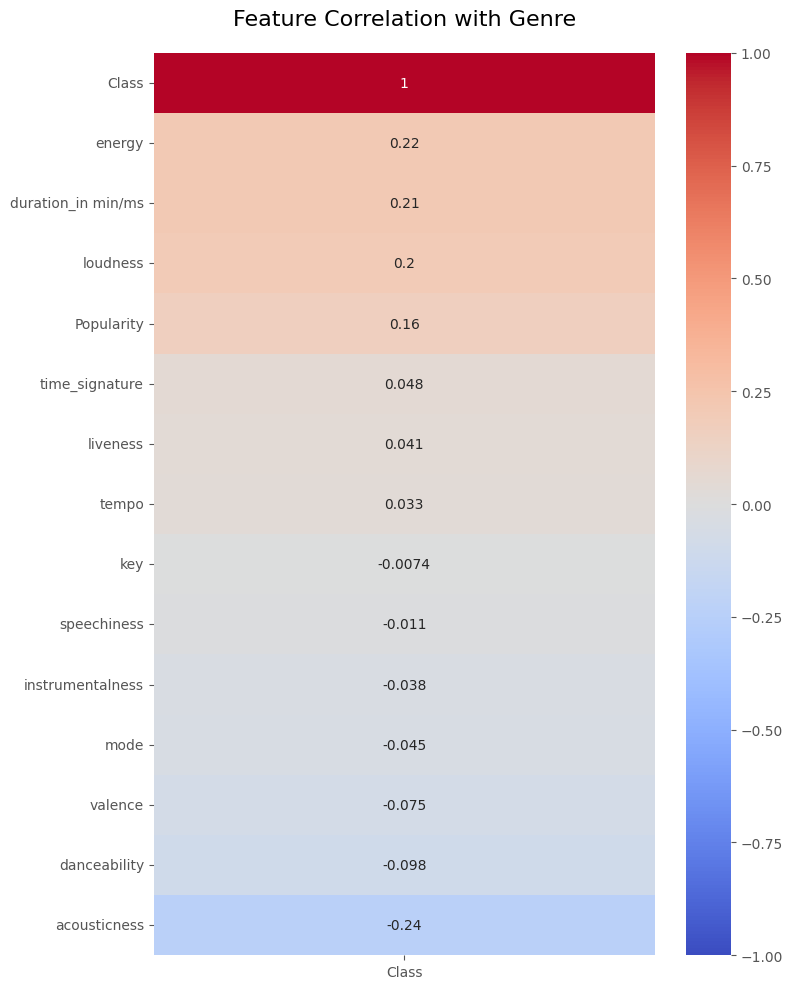

                    Popularity  danceability    energy       key  loudness  \
Popularity            1.000000      0.164706  0.050626  0.005182  0.119561   
danceability          0.164706      1.000000 -0.093838  0.006290 -0.039352   
energy                0.050626     -0.093838  1.000000  0.014780  0.694405   
key                   0.005182      0.006290  0.014780  1.000000  0.005839   
loudness              0.119561     -0.039352  0.694405  0.005839  1.000000   
mode                  0.016764     -0.067135 -0.035880 -0.106508 -0.043732   
speechiness           0.039459      0.130094  0.215895 -0.000298  0.169694   
acousticness         -0.123484      0.009055 -0.745963 -0.008485 -0.541858   
instrumentalness     -0.168460     -0.215373 -0.146278  0.002923 -0.225975   
liveness             -0.037201     -0.086981  0.204873  0.006662  0.131321   
valence               0.053617      0.444548  0.222998  0.029965  0.097261   
tempo                -0.007107     -0.183655  0.210525  0.012155

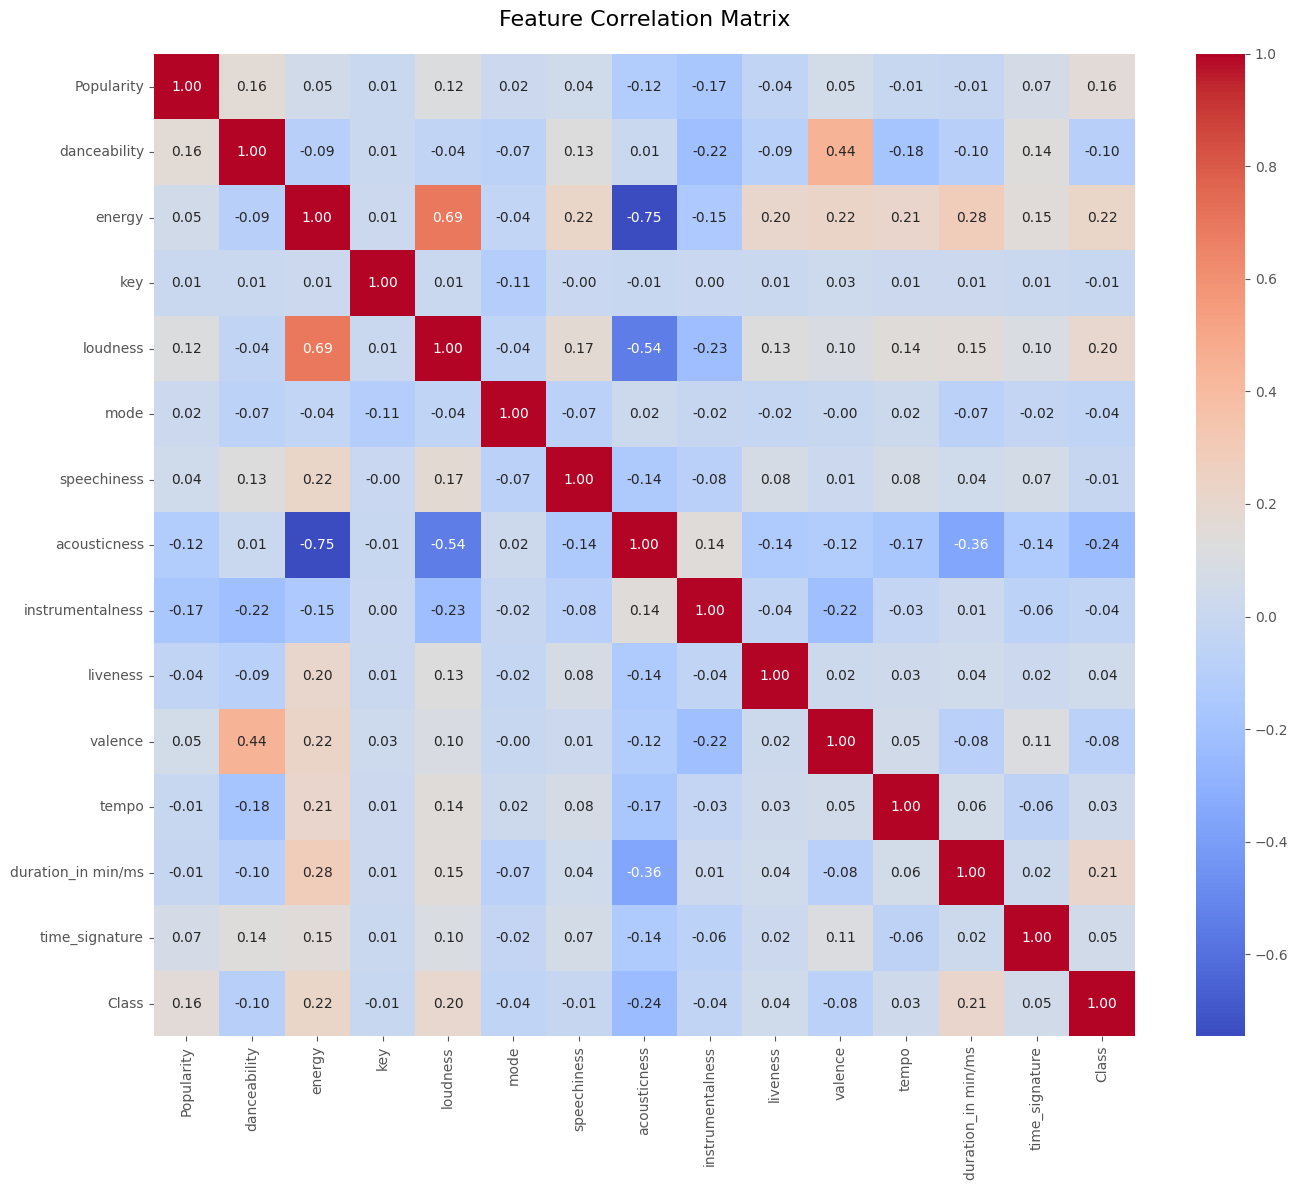

In [18]:
# 5.3 Correlation Analysis
print("\n=== Correlation Analysis ===")

# Correlation with target
corr_with_target = train_df[numerical_features ].corr()[['Class']].sort_values('Class', ascending=False)

plt.figure(figsize=(8,10))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Genre', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Full correlation matrix
plt.figure(figsize=(14,12))
corr_matrix = train_df[numerical_features ].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap='coolwarm')
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()



=== Feature Relationships by Genre ===


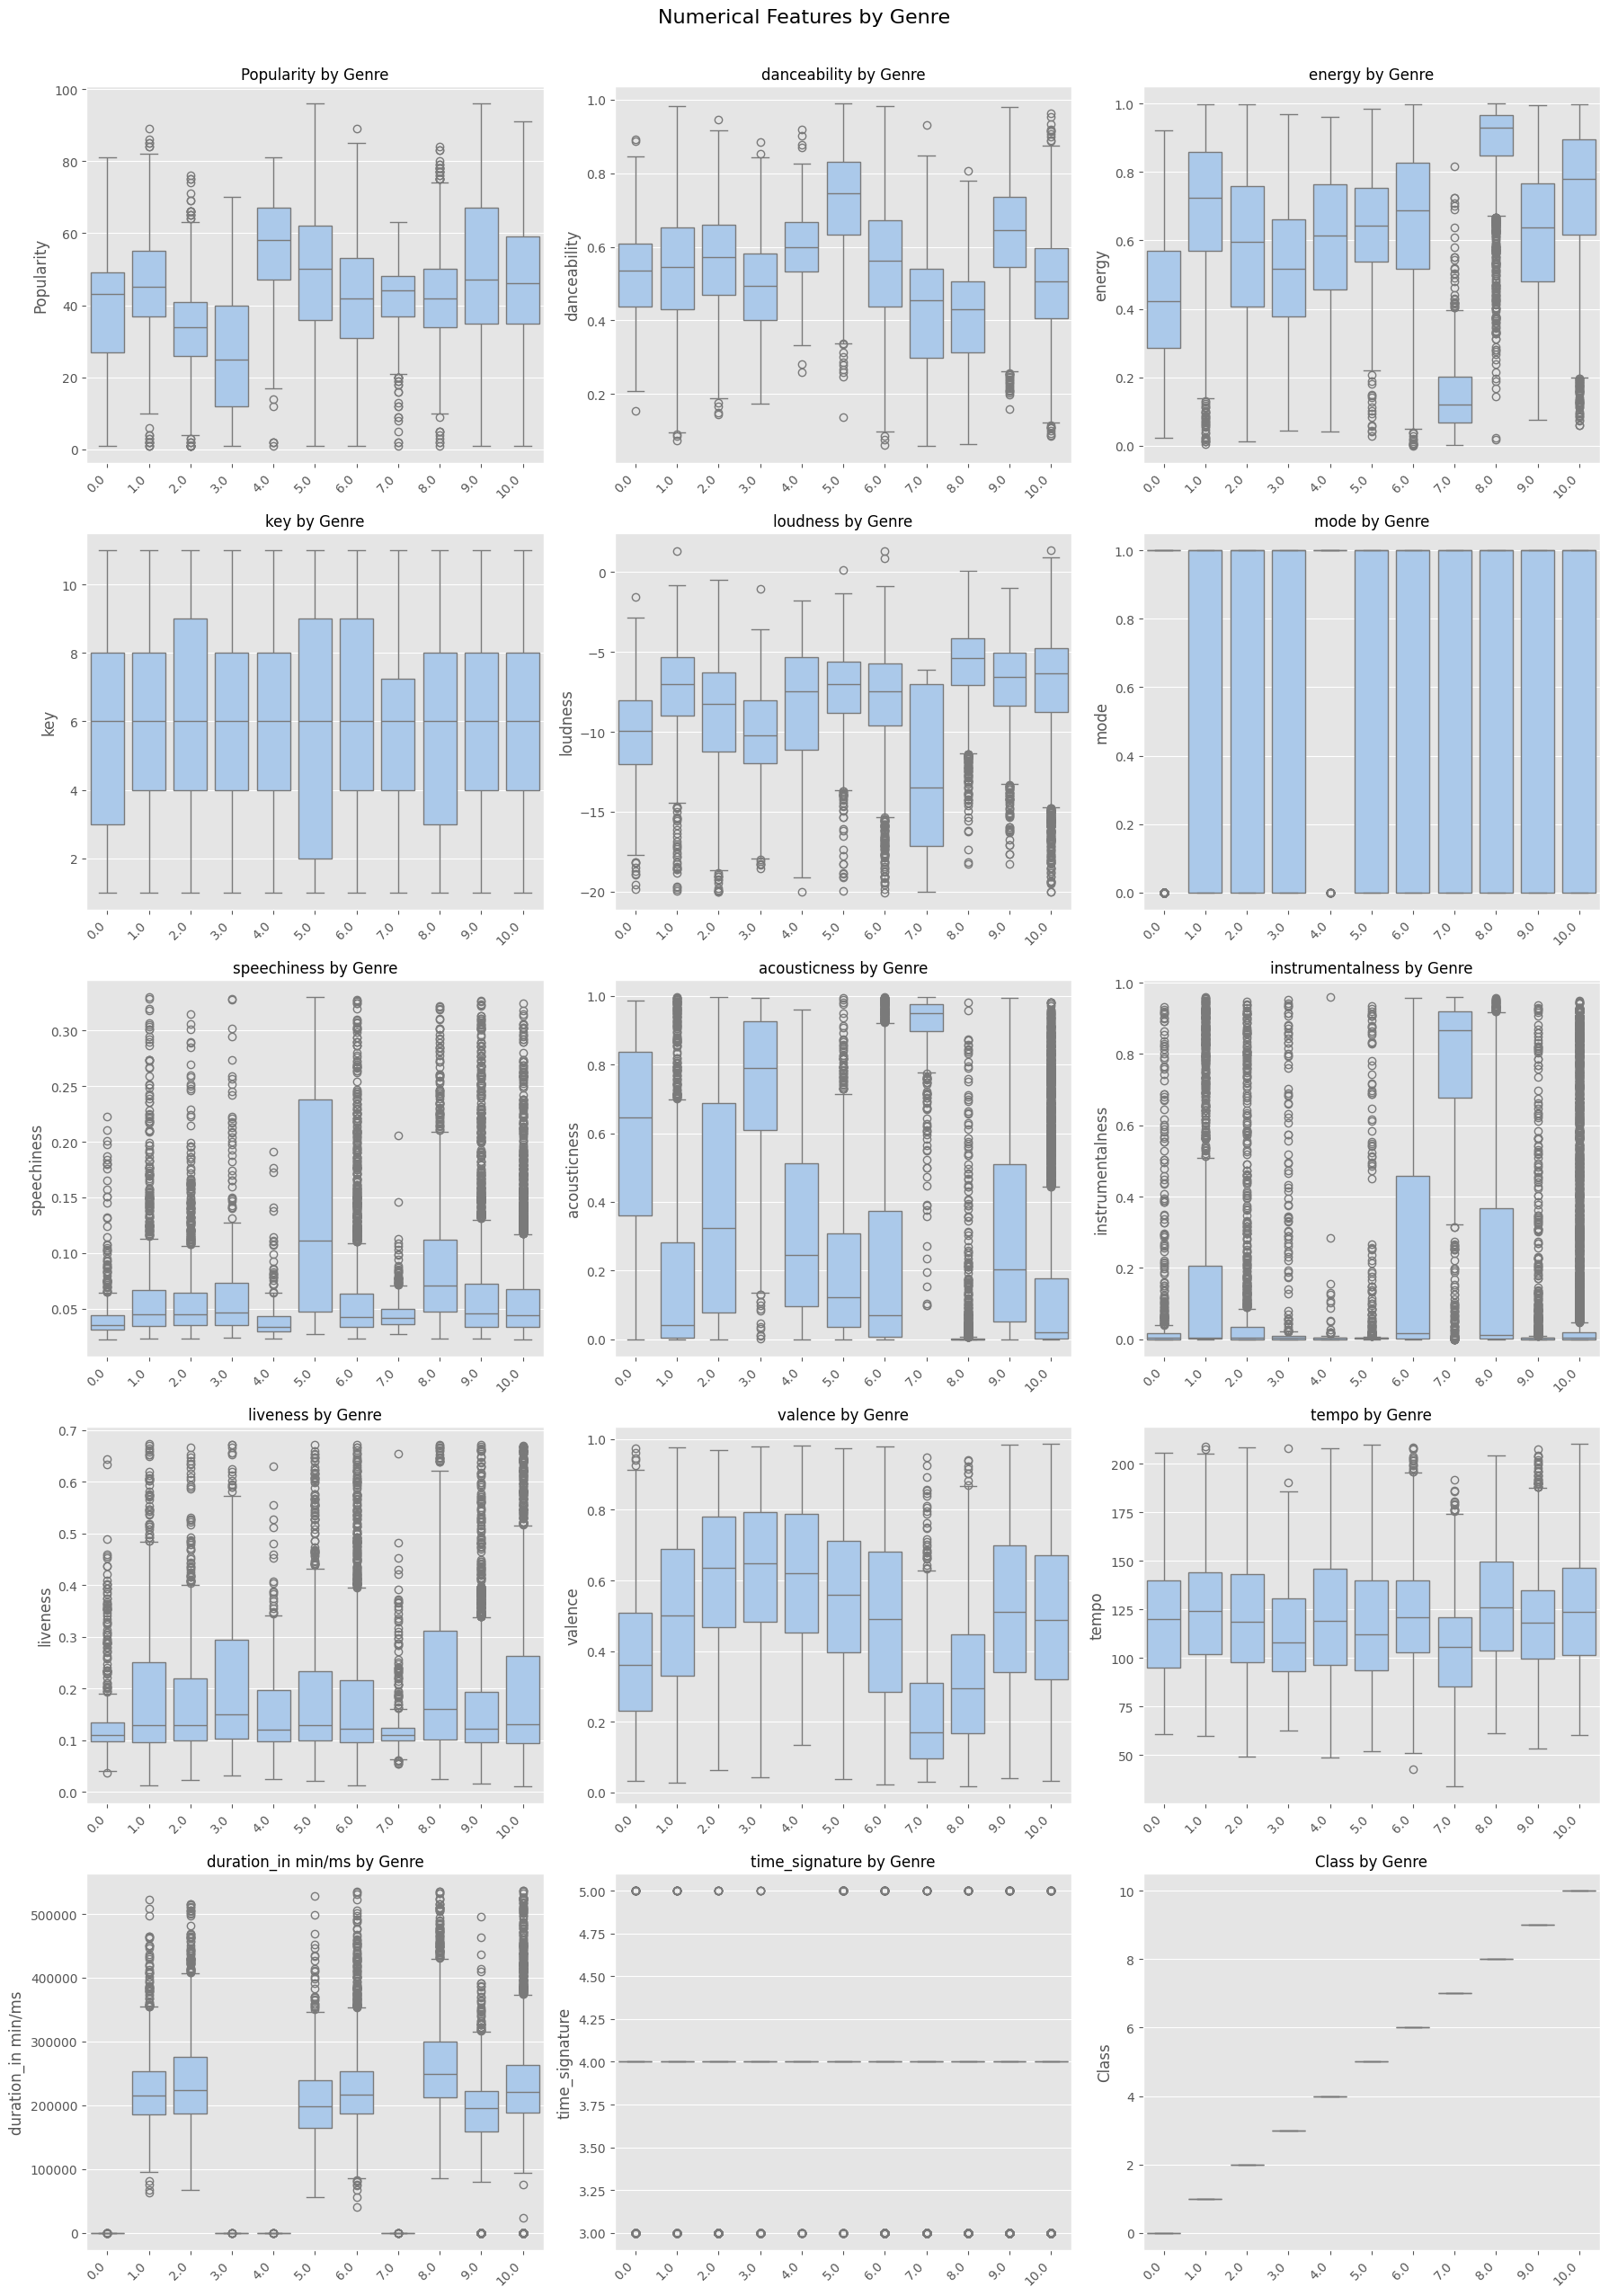

In [19]:
# 5.4 Feature Relationships by Genre
print("\n=== Feature Relationships by Genre ===")

plt.figure(figsize=(18, 5*n_rows))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Class', y=col, data=train_df)
    plt.title(f'{col} by Genre', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('Numerical Features by Genre', y=1.02, fontsize=16)
plt.show()


=== Pairplot of Key Features ===


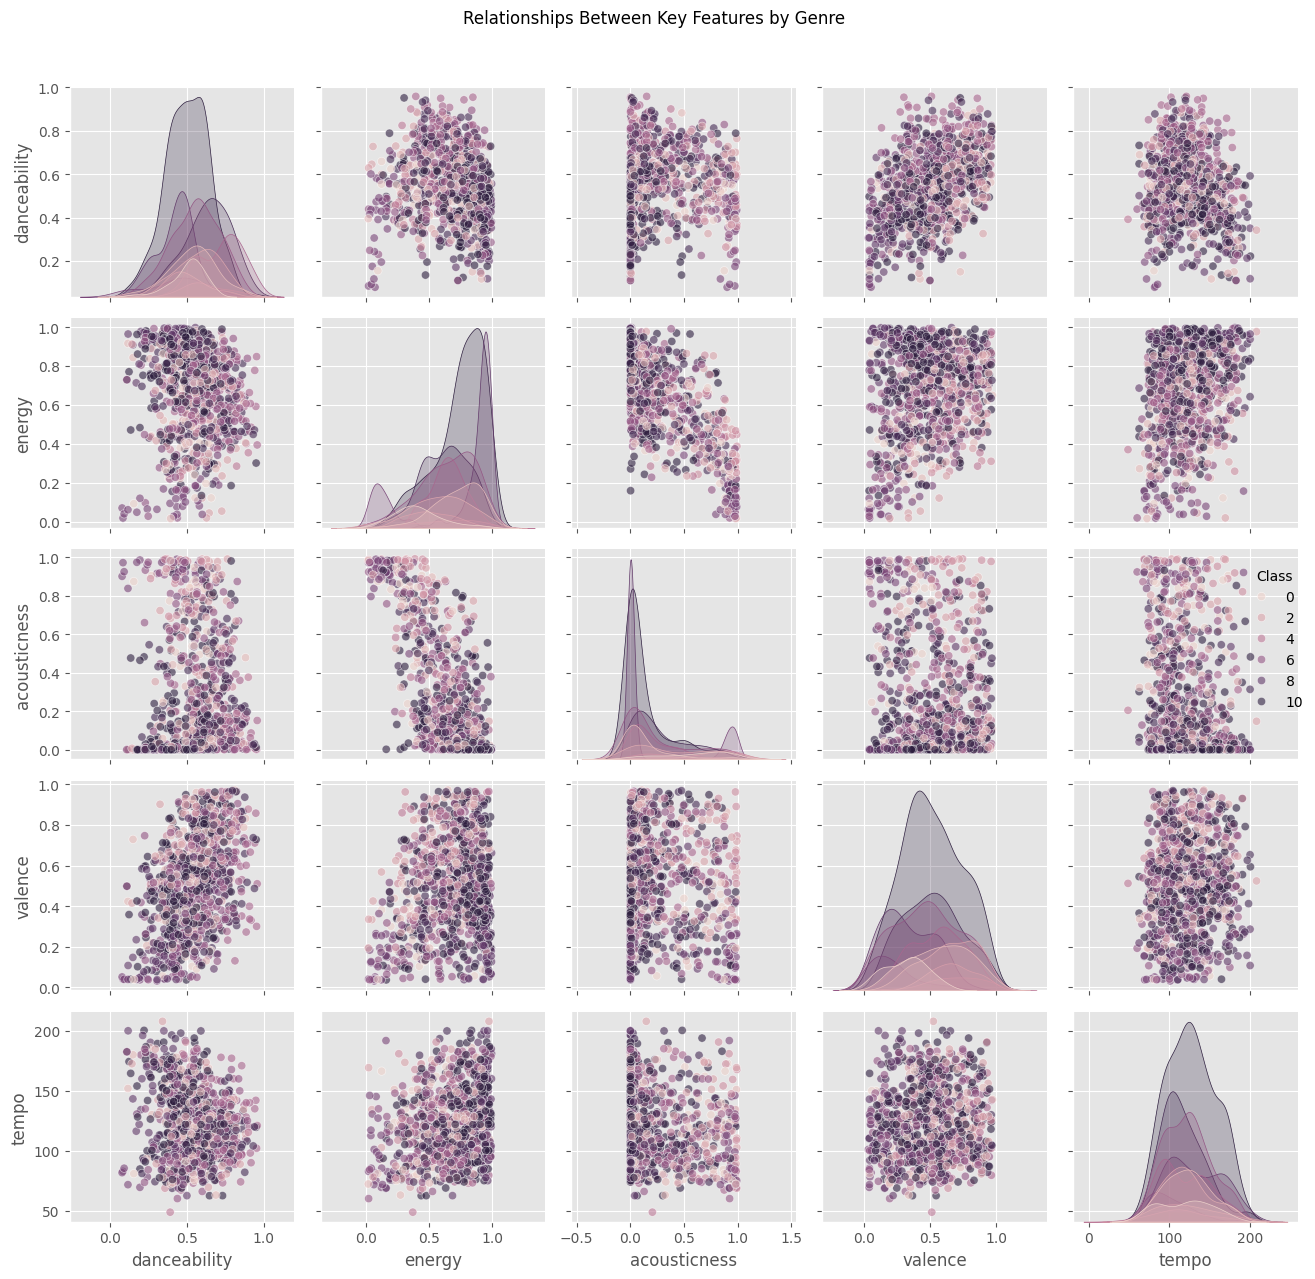

In [20]:
# 5.5 Pairplot of Key Features
print("\n=== Pairplot of Key Features ===")

# Select important features based on correlation
key_features = ['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'Class']
key_features = [f for f in key_features if f in train_df.columns]

# Sample data if large
plot_data = train_df.sample(1000) if len(train_df) > 1000 else train_df

sns.pairplot(plot_data[key_features], hue='Class', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Relationships Between Key Features by Genre', y=1.02)
plt.tight_layout()
plt.show()


In [21]:

#multivariate analysis of numerical features before encoding categorical features
# Now we have Define a function for variance_inflation_factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):

    # Now Calculate the VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by = ['VIF'], ascending=False ))

In [22]:
# Select only numeric columns and drop any that contain NaN or non-numeric values
train_df_numeric = train_df.select_dtypes(include=[np.number]).dropna()

# Then call your function
vif_calc(train_df_numeric)


,variables,VIF
13,time_signature,86.088435
2,energy,29.465489
11,tempo,18.122802
1,danceability,17.360661
4,loudness,11.418679
0,Popularity,8.355573
10,valence,7.578906
14,Class,6.041356
12,duration_in min/ms,5.750045
3,key,4.919323


<h2>Feature engineering and encoding some  categorical features</h2>

In [23]:
# feature engineering and encoding some  categorical features
y=train_df.iloc[:,-1]
X=train_df.copy()
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Frequency encode Track Name
track_freq = X["Track Name"].value_counts().to_dict()
X["Track_Freq"] = X["Track Name"].map(track_freq)

# Target encode Track Name
track_target_encoder = TargetEncoder()
X["Track_Name_TE"] = track_target_encoder.fit_transform(X["Track Name"], y_encoded)

# Drop original Track Name
X = X.drop("Track Name", axis=1)

# Target encode Artist Name
artist_target_encoder = TargetEncoder()
X["Artist Name"] = artist_target_encoder.fit_transform(X["Artist Name"], y_encoded)

In [24]:
print(X.head())

   Artist Name  Popularity  danceability  energy   key  loudness  mode  \
0     6.914899        60.0         0.854   0.564   1.0    -4.964   1.0   
1     7.298588        54.0         0.382   0.814   3.0    -7.230   1.0   
2     6.330899        35.0         0.434   0.614   6.0    -8.334   1.0   
3     6.433876        66.0         0.853   0.597  10.0    -6.528   0.0   
4     7.943283        53.0         0.167   0.975   2.0    -4.279   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0485      0.017100          0.003910    0.0849   0.8990  134.071   
1       0.0406      0.001100          0.004010    0.1010   0.5690  116.454   
2       0.0525      0.486000          0.000196    0.3940   0.7870  147.681   
3       0.0555      0.021200          0.003910    0.1220   0.5690  107.033   
4       0.2160      0.000169          0.016100    0.1720   0.0918  199.060   

   duration_in min/ms  time_signature  Class  Track_Freq  Track_Name_TE  
0           

In [25]:
X.isnull().sum()

Artist Name           0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Track_Freq            0
Track_Name_TE         0
dtype: int64

In [26]:
X=X.drop("Class",axis=1)

<h2>Standard Scaling</h2>

In [27]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Select only numeric columns and drop any that contain NaN or non-numeric values
X_numeric = X.select_dtypes(include=[np.number]).dropna()

# Then call your function
vif_calc(X_numeric)


,variables,VIF
16,Track_Name_TE,457.071273
0,Artist Name,238.288525
14,time_signature,157.297617
3,energy,31.866595
12,tempo,19.118959
2,danceability,17.559651
5,loudness,11.862234
1,Popularity,8.719346
11,valence,7.676727
13,duration_in min/ms,5.864716


In [29]:
X_numeric.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Track_Freq,Track_Name_TE
0,6.914899,60.0,0.854,0.564,1.0,-4.964,1.0,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0,4.0,1,6.475181
1,7.298588,54.0,0.382,0.814,3.0,-7.230,1.0,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4.0,1,7.125723
2,6.330899,35.0,0.434,0.614,6.0,-8.334,1.0,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4.0,1,6.605289
3,6.433876,66.0,0.853,0.597,10.0,-6.528,0.0,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0,4.0,1,6.475181
4,7.943283,53.0,0.167,0.975,2.0,-4.279,1.0,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4.0,1,7.125723


In [30]:
X_preprocessed_df = pd.DataFrame(X_scaled, columns=X.columns)
X_preprocessed_df["Target"] = y_encoded
print("Preprocessing done. Saved to X_preprocessed_df")

Preprocessing done. Saved to X_preprocessed_df


<h1>Standard Scaling Test</h1>

In [31]:
test_df.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [32]:
# --- Frequency Encode 'Track Name' ---
test_df["Track_Freq"] = test_df["Track Name"].map(track_freq)

# --- Target Encode using pre-fit encoders from training ---
test_df["Track_Name_TE"] = track_target_encoder.transform(test_df["Track Name"])
test_df["Artist Name"] = artist_target_encoder.transform(test_df["Artist Name"])

# --- Drop original 'Track Name' ---
test_df = test_df.drop("Track Name", axis=1)

In [33]:
X_test=test_df

In [34]:
missing = X_test["Track_Freq"].isna().sum()
print(f" Unseen Track Names in test(not present in train): {missing}")


 Unseen Track Names in test(not present in train): 5429


In [35]:
X_test.isnull().sum()

Artist Name              0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Track_Freq            5429
Track_Name_TE            0
dtype: int64

In [36]:
#filling the missing values in Track_Freq
median_freq = np.median(list(track_freq.values()))
X_test.loc[:, "Track_Freq"] = X_test["Track_Freq"].fillna(median_freq)

In [37]:
#no of missing values after filling
X_test.isnull().sum()

Artist Name           0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Track_Freq            0
Track_Name_TE         0
dtype: int64

In [38]:
X_test_scaled = scaler.transform(X_test)

In [39]:
print("Preprocessing test.csv done. Saved to X_test_scaled")

Preprocessing test.csv done. Saved to X_test_scaled


In [40]:
X_preprocessed_df.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Track_Freq,Track_Name_TE,Target
0,0.200533,0.903566,1.867915,-0.419671,-1.645675,0.782882,0.755294,-0.354569,-0.740387,-0.476209,-0.767736,1.718614,0.389362,0.373384,0.206234,-0.49546,-0.576238,5
1,0.802548,0.554342,-0.970946,0.642500,-0.981798,0.110913,0.755294,-0.491912,-0.791896,-0.475843,-0.635278,0.344694,-0.207873,0.543267,0.206234,-0.49546,1.123796,10
2,-0.715776,-0.551535,-0.658190,-0.207237,0.014018,-0.216472,0.755294,-0.285028,0.769157,-0.489818,1.775296,1.252314,0.850756,-0.865065,0.206234,-0.49546,-0.236231,6
3,-0.554203,1.252791,1.861901,-0.279465,1.341773,0.319087,-1.323988,-0.232872,-0.727188,-0.476209,-0.462506,0.344694,-0.527256,-0.227635,0.206234,-0.49546,-0.576238,5
4,1.814089,0.496138,-2.264071,1.326539,-1.313736,0.986015,0.755294,2.557460,-0.794893,-0.431544,-0.051146,-1.642078,2.592561,0.327426,0.206234,-0.49546,1.123796,10


<h1>Data Training</h1>

In [41]:
# Fix seeds
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
set_seed()

df=X_preprocessed_df
X_scaled=df.drop(["Target"],axis=1)
y_cleaned = df["Target"]
le=LabelEncoder()
le.fit(y_cleaned)
print()

<h3>arrays for Evaluation metrics</h3>

In [42]:
way=[]
best_acc=[]
precision=[]
recall=[]
f1_score=[]

<h2>Neural Networks</h2>


--- Fold 1 ---
Epoch  1 | Fold 1 | Val Accuracy: 0.3657
Epoch  2 | Fold 1 | Val Accuracy: 0.4459
Epoch  3 | Fold 1 | Val Accuracy: 0.5711
Epoch  4 | Fold 1 | Val Accuracy: 0.6348
Epoch  5 | Fold 1 | Val Accuracy: 0.6744
Epoch  6 | Fold 1 | Val Accuracy: 0.6813
Epoch  7 | Fold 1 | Val Accuracy: 0.7081
Epoch  8 | Fold 1 | Val Accuracy: 0.7148
Epoch  9 | Fold 1 | Val Accuracy: 0.7383
Epoch 10 | Fold 1 | Val Accuracy: 0.7460
Epoch 11 | Fold 1 | Val Accuracy: 0.7566
Epoch 12 | Fold 1 | Val Accuracy: 0.7655
Epoch 13 | Fold 1 | Val Accuracy: 0.7726
Epoch 14 | Fold 1 | Val Accuracy: 0.7828
Epoch 15 | Fold 1 | Val Accuracy: 0.7856
Epoch 16 | Fold 1 | Val Accuracy: 0.7955
Epoch 17 | Fold 1 | Val Accuracy: 0.7986
Epoch 18 | Fold 1 | Val Accuracy: 0.8015
Epoch 19 | Fold 1 | Val Accuracy: 0.8041
Epoch 20 | Fold 1 | Val Accuracy: 0.8068
Epoch 21 | Fold 1 | Val Accuracy: 0.8091
Epoch 22 | Fold 1 | Val Accuracy: 0.8083
Epoch 23 | Fold 1 | Val Accuracy: 0.8086
Epoch 24 | Fold 1 | Val Accuracy: 0.8090


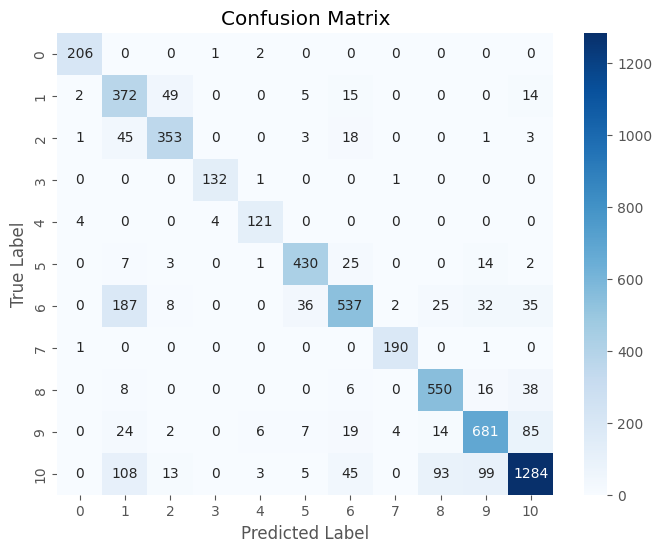

In [43]:
# Define nn model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training loop
fold = 1
best_overall_acc = 0
best_preds, best_labels = None, None

for train_idx, val_idx in skf.split(X_scaled, y_cleaned):
    print(f"\n--- Fold {fold} ---")
    x_train_fold, x_val_fold = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_idx], y_cleaned.iloc[val_idx]

    smote = SMOTE(random_state=42)
    x_train_res, y_train_res = smote.fit_resample(x_train_fold, y_train_fold)

    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

    train_loader = DataLoader(TensorDataset(torch.tensor(x_train_res.values, dtype=torch.float32), torch.tensor(y_train_res.values, dtype=torch.long)), batch_size=32, shuffle=True)
    val_loader = DataLoader(TensorDataset(torch.tensor(x_val_fold.values, dtype=torch.float32), torch.tensor(y_val_fold.values, dtype=torch.long)), batch_size=64)

    model = SimpleNN(input_dim=X_scaled.shape[1], output_dim=len(np.unique(y_cleaned))).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-3, steps_per_epoch=len(train_loader), epochs=25)

    best_fold_acc = 0
    best_fold_preds, best_fold_labels = None, None

    for epoch in range(25):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            scheduler.step()

        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                out = model(xb)
                all_preds.extend(torch.argmax(out, dim=1).cpu().numpy())
                all_labels.extend(yb.numpy())

        acc = np.mean(np.array(all_preds) == np.array(all_labels))
        if acc > best_fold_acc:
            best_fold_acc = acc
            best_fold_preds = all_preds
            best_fold_labels = all_labels

        print(f"Epoch {epoch+1:2d} | Fold {fold} | Val Accuracy: {acc:.4f}")

    if best_fold_acc > best_overall_acc:
        best_overall_acc = best_fold_acc
        best_preds = best_fold_preds
        best_labels = best_fold_labels

    fold += 1
# target_names = sorted(y_cleaned.unique().tolist())
way.append('NeuralNetwork (sigmoid)')
print("\nBest Validation Accuracy across all folds:", round(best_overall_acc, 4))
best_acc.append(round(best_overall_acc, 4))
print("\nClassification Report:")
target_names = [str(cls) for cls in le.classes_]
print(classification_report(best_labels, best_preds, target_names=target_names))

report = classification_report(best_labels, best_preds, target_names=target_names, output_dict=True)
# For macro-average scores
precision.append(round(report['macro avg']['precision'],4))
recall.append(round(report['macro avg']['recall'],4))
f1_score.append(round(report['macro avg']['f1-score'],4))

cm = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h2>Logistic Regression</h2>


--- Fold 1 ---
Validation Accuracy for Fold 1: 0.7255

--- Fold 2 ---
Validation Accuracy for Fold 2: 0.7228

--- Fold 3 ---
Validation Accuracy for Fold 3: 0.7137

Best Validation Accuracy across all folds: 0.7255

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       208
           1       0.50      0.59      0.54       458
           2       0.68      0.78      0.73       424
           3       0.98      0.90      0.94       134
           4       0.82      0.95      0.88       129
           5       0.72      0.76      0.74       483
           6       0.59      0.54      0.56       863
           7       0.99      0.99      0.99       192
           8       0.72      0.83      0.77       618
           9       0.70      0.75      0.73       841
          10       0.82      0.70      0.75      1649

    accuracy                           0.73      5999
   macro avg       0.77      0.79      0.78      5999
we

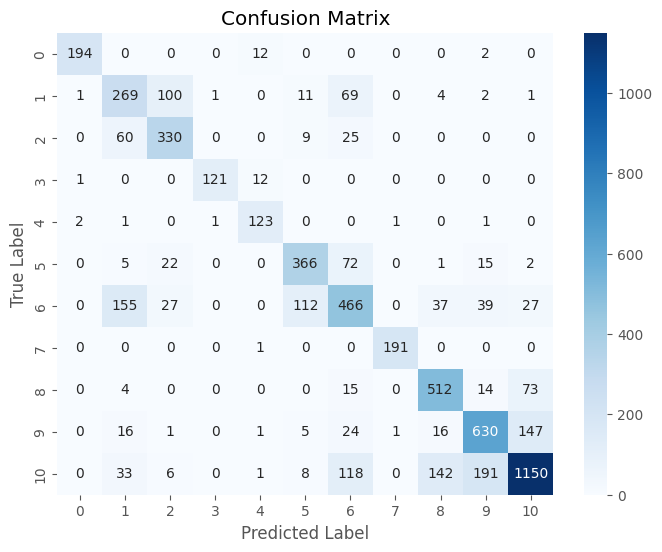

In [44]:
# Stratified K-Fold setup for LR
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_overall_acc = 0
best_preds, best_labels = None, None

# Training loop with Stratified K-Fold for LR
fold = 1
for train_idx, val_idx in skf.split(X_scaled, y_cleaned):
    print(f"\n--- Fold {fold} ---")
    x_train_fold, x_val_fold = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_idx], y_cleaned.iloc[val_idx]

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    x_train_res, y_train_res = smote.fit_resample(x_train_fold, y_train_fold)

    # Compute class weights for the training set
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weights_dict = dict(zip(np.unique(y_train_res), class_weights))

    # Initialize and train Logistic Regression model
    model = LogisticRegression(max_iter=1000, class_weight=class_weights_dict, solver='lbfgs', multi_class='multinomial', random_state=42)
    model.fit(x_train_res, y_train_res)

    # Evaluate the model on the validation set
    val_preds = model.predict(x_val_fold)
    val_accuracy = np.mean(val_preds == y_val_fold)
    print(f"Validation Accuracy for Fold {fold}: {val_accuracy:.4f}")

    # Track best performing fold
    if val_accuracy > best_overall_acc:
        best_overall_acc = val_accuracy
        best_preds = val_preds
        best_labels = y_val_fold

    fold += 1

# Print best validation accuracy across all 
way.append('Logistic Regression')
print("\nBest Validation Accuracy across all folds:", round(best_overall_acc, 4))
best_acc.append(round(best_overall_acc, 4))
# Print the classification report
print("\nClassification Report:")
# target_names = sorted(y_cleaned.unique().tolist())
target_names = [str(cls) for cls in le.classes_]
print(classification_report(best_labels, best_preds, target_names=target_names))

report = classification_report(best_labels, best_preds, target_names=target_names, output_dict=True)
# For macro-average scores
precision.append(round(report['macro avg']['precision'],4))
recall.append(round(report['macro avg']['recall'],4))
f1_score.append(round(report['macro avg']['f1-score'],4))

cm = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h2>Naive Bayes</h2>


===== Naive Bayes Classifier =====

--- Fold 1 ---
Fold 1 | Validation Accuracy: 0.6956

--- Fold 2 ---
Fold 2 | Validation Accuracy: 0.6838

--- Fold 3 ---
Fold 3 | Validation Accuracy: 0.6842

Best Validation Accuracy: 0.6956

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       208
           1       0.49      0.52      0.51       458
           2       0.65      0.78      0.71       424
           3       1.00      0.90      0.94       134
           4       0.86      0.88      0.87       129
           5       0.65      0.81      0.72       483
           6       0.62      0.54      0.57       863
           7       1.00      0.95      0.98       192
           8       0.70      0.84      0.76       618
           9       0.59      0.81      0.68       841
          10       0.84      0.57      0.68      1649

    accuracy                           0.70      5999
   macro avg       0.76      0.78      0.76

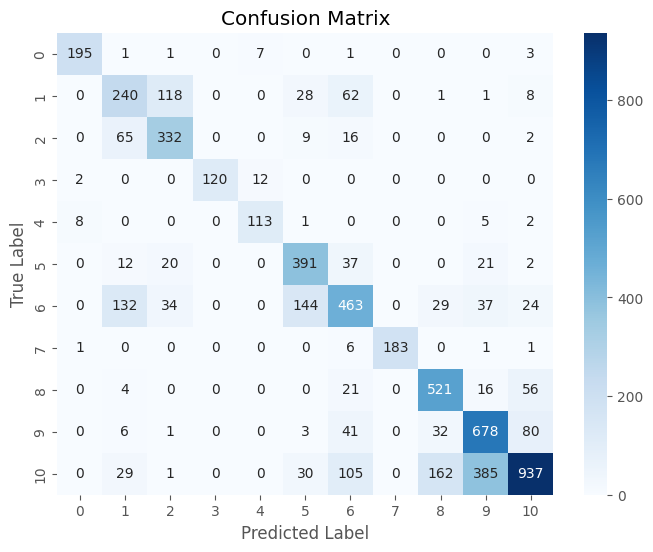

In [45]:
##  Naive Bayes Classifier
# ------------------------
print("\n===== Naive Bayes Classifier =====")
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
fold = 1
best_overall_acc = 0
best_preds, best_labels = None, None

for train_idx, val_idx in skf.split(X_scaled, y_cleaned):
    print(f"\n--- Fold {fold} ---")
    x_train_fold, x_val_fold = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_idx], y_cleaned.iloc[val_idx]

    smote = SMOTE(random_state=42)
    x_train_res, y_train_res = smote.fit_resample(x_train_fold, y_train_fold)

    model = GaussianNB()
    model.fit(x_train_res, y_train_res)

    val_preds = model.predict(x_val_fold)
    acc = np.mean(val_preds == y_val_fold)
    print(f"Fold {fold} | Validation Accuracy: {acc:.4f}")

    if acc > best_overall_acc:
        best_overall_acc = acc
        best_preds = val_preds
        best_labels = y_val_fold

    fold += 1
way.append('Naive Bayes')
print("\nBest Validation Accuracy:", round(best_overall_acc, 4))
best_acc.append(round(best_overall_acc, 4))
print("\nClassification Report:")
target_names = [str(cls) for cls in le.classes_]
print(classification_report(best_labels, best_preds, target_names=target_names))

report = classification_report(best_labels, best_preds, target_names=target_names, output_dict=True)
# For macro-average scores
precision.append(round(report['macro avg']['precision'],4))
recall.append(round(report['macro avg']['recall'],4))
f1_score.append(round(report['macro avg']['f1-score'],4))

# Confusion Matrix
cm = confusion_matrix(best_labels, best_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h2>Random Forest</h2>


--- Fold 1 ---
Validation Accuracy for Fold 1: 0.8255

--- Fold 2 ---
Validation Accuracy for Fold 2: 0.8185

--- Fold 3 ---
Validation Accuracy for Fold 3: 0.8191

Best Validation Accuracy across all folds: 0.8255

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       208
           1       0.45      0.59      0.51       458
           2       0.92      0.93      0.92       424
           3       1.00      1.00      1.00       134
           4       0.99      0.97      0.98       129
           5       0.96      0.95      0.95       483
           6       0.72      0.68      0.70       863
           7       1.00      1.00      1.00       192
           8       0.84      0.90      0.87       618
           9       0.85      0.87      0.86       841
          10       0.86      0.79      0.82      1649

    accuracy                           0.83      5999
   macro avg       0.87      0.88      0.87      5999
we

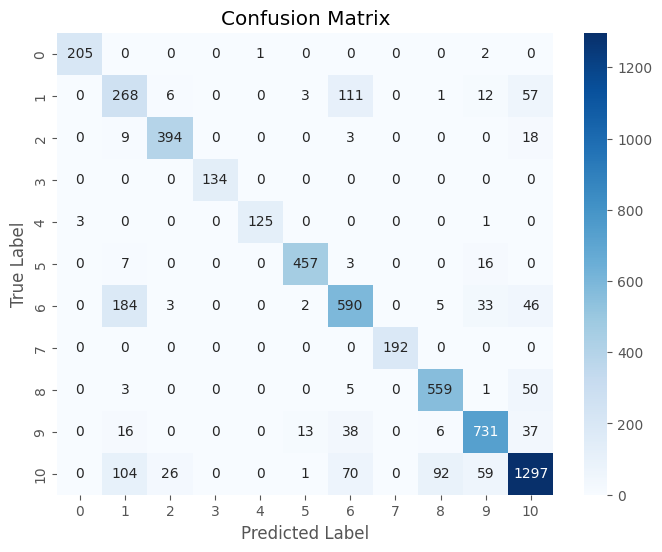

In [46]:
# Stratified K-Fold setup for Random Forest
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_overall_acc = 0
best_preds, best_labels = None, None

# Training loop with Stratified K-Fold for Random Forest
fold = 1
for train_idx, val_idx in skf.split(X_scaled, y_cleaned):
    print(f"\n--- Fold {fold} ---")
    x_train_fold, x_val_fold = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_idx], y_cleaned.iloc[val_idx]

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    x_train_res, y_train_res = smote.fit_resample(x_train_fold, y_train_fold)

    # Compute class weights for the training set
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weights_dict = dict(zip(np.unique(y_train_res), class_weights))

    # Initialize and train Random Forest model
    model = RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict, random_state=42)
    model.fit(x_train_res, y_train_res)

    # Evaluate the model on the validation set
    val_preds = model.predict(x_val_fold)
    val_accuracy = np.mean(val_preds == y_val_fold)
    print(f"Validation Accuracy for Fold {fold}: {val_accuracy:.4f}")

    # Track best performing fold
    if val_accuracy > best_overall_acc:
        best_model_cls=model
        best_overall_acc = val_accuracy
        best_preds = val_preds
        best_labels = y_val_fold

    fold += 1

# Print best validation accuracy across all folds
way.append('Random Forest')
print("\nBest Validation Accuracy across all folds:", round(best_overall_acc, 4))
best_acc.append(round(best_overall_acc, 4))
# Print the classification report
print("\nClassification Report:")
print(classification_report(best_labels, best_preds, target_names=target_names))

report = classification_report(best_labels, best_preds, target_names=target_names, output_dict=True)
# For macro-average scores
precision.append(round(report['macro avg']['precision'],4))
recall.append(round(report['macro avg']['recall'],4))
f1_score.append(round(report['macro avg']['f1-score'],4))

# Compute and print confusion matrix
cm = confusion_matrix(best_labels, best_preds)

# Optional: Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


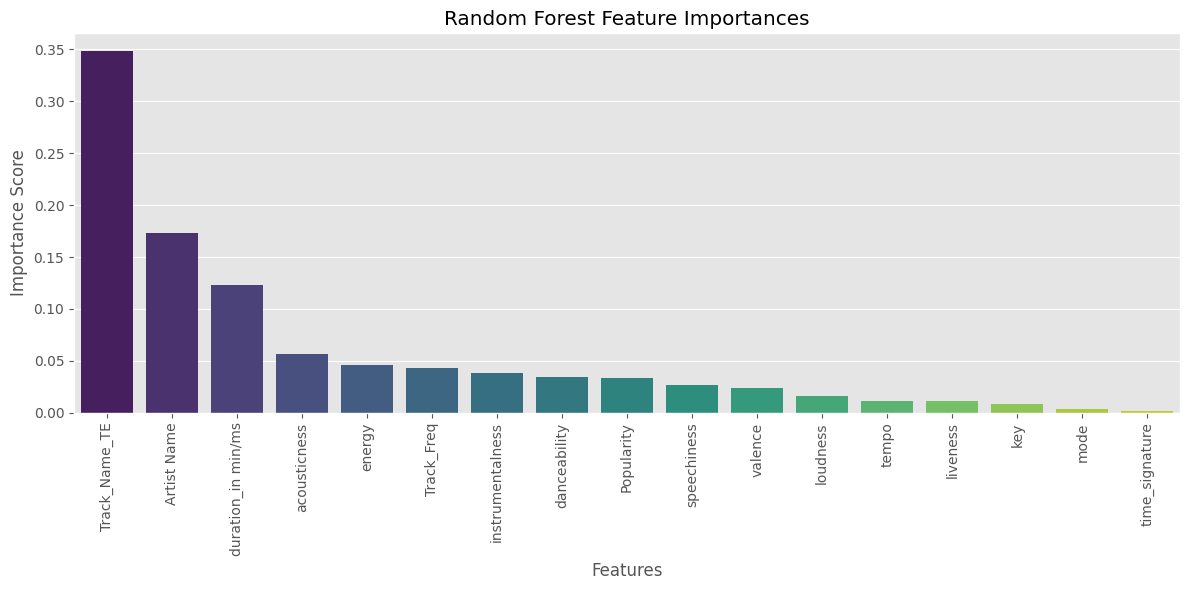

In [47]:
#feature importance plot for best model
# Get feature importances
importances = best_model_cls.feature_importances_

# Define feature names (replace with actual names if available)
try:
    feature_names = X_test_scaled.columns  # Works if X_test_scaled is a DataFrame
except AttributeError:
    feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=np.array(feature_names)[indices], y=importances[indices], palette="viridis")
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h2>Descision Tree</h2>


--- Fold 1 ---
Validation Accuracy for Fold 1: 0.8046

--- Fold 2 ---
Validation Accuracy for Fold 2: 0.7965

--- Fold 3 ---
Validation Accuracy for Fold 3: 0.8003

Best Validation Accuracy across all folds: 0.8046

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       208
           1       0.43      0.52      0.47       458
           2       0.87      0.91      0.89       424
           3       0.98      0.99      0.99       134
           4       0.98      0.93      0.95       129
           5       0.96      0.92      0.94       483
           6       0.67      0.70      0.69       863
           7       0.95      0.98      0.97       192
           8       0.82      0.88      0.85       618
           9       0.83      0.84      0.84       841
          10       0.86      0.77      0.81      1649

    accuracy                           0.80      5999
   macro avg       0.85      0.85      0.85      5999
we

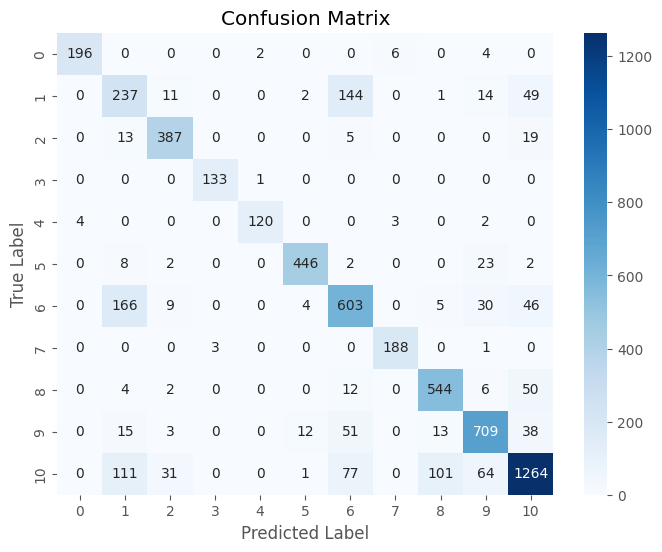

In [48]:
# Stratified K-Fold setup for Decision Tree
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_overall_acc = 0
best_preds, best_labels = None, None

# Training loop with Stratified K-Fold for Decision Tree
fold = 1
for train_idx, val_idx in skf.split(X_scaled, y_cleaned):
    print(f"\n--- Fold {fold} ---")
    x_train_fold, x_val_fold = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_idx], y_cleaned.iloc[val_idx]

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    x_train_res, y_train_res = smote.fit_resample(x_train_fold, y_train_fold)

    # Compute class weights for the training set
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weights_dict = dict(zip(np.unique(y_train_res), class_weights))

    # Initialize and train Decision Tree model
    model = DecisionTreeClassifier(class_weight=class_weights_dict, random_state=42)
    model.fit(x_train_res, y_train_res)

    # Evaluate the model on the validation set
    val_preds = model.predict(x_val_fold)
    val_accuracy = np.mean(val_preds == y_val_fold)
    print(f"Validation Accuracy for Fold {fold}: {val_accuracy:.4f}")

    # Track best performing fold
    if val_accuracy > best_overall_acc:
        best_overall_acc = val_accuracy
        best_preds = val_preds
        best_labels = y_val_fold
        dec_tree=model
    fold += 1

# Append Decision Tree model to 'way' and its best accuracy to 'best_acc'
way.append('Decision Tree')
best_acc.append(round(best_overall_acc, 4))

# Print best validation accuracy across all folds
print("\nBest Validation Accuracy across all folds:", round(best_overall_acc, 4))

# Print the classification report
print("\nClassification Report:")
target_names = [str(cls) for cls in np.unique(y_cleaned)]  # Adjust target names if needed
print(classification_report(best_labels, best_preds, target_names=target_names))

report = classification_report(best_labels, best_preds, target_names=target_names, output_dict=True)

# For macro-average scores
precision.append(round(report['macro avg']['precision'], 4))
recall.append(round(report['macro avg']['recall'], 4))
f1_score.append(round(report['macro avg']['f1-score'], 4))

# Compute and print confusion matrix
cm = confusion_matrix(best_labels, best_preds)

# Optional: Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h2>SVM</h2>


--- Fold 1 ---
Validation Accuracy for Fold 1: 0.8220

--- Fold 2 ---
Validation Accuracy for Fold 2: 0.8155

--- Fold 3 ---
Validation Accuracy for Fold 3: 0.8126

Best Validation Accuracy across all folds: 0.822

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       208
           1       0.49      0.88      0.63       458
           2       0.90      0.85      0.88       424
           3       1.00      0.98      0.99       134
           4       0.95      0.95      0.95       129
           5       0.87      0.87      0.87       483
           6       0.78      0.64      0.70       863
           7       0.99      0.99      0.99       192
           8       0.80      0.87      0.83       618
           9       0.86      0.83      0.84       841
          10       0.91      0.80      0.85      1649

    accuracy                           0.82      5999
   macro avg       0.87      0.87      0.86      5999
wei

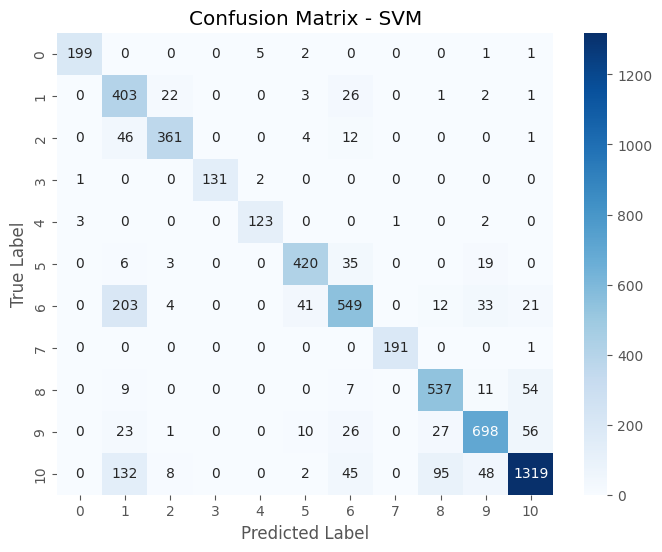

In [49]:
#SVM
# Stratified K-Fold setup for SVM
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_overall_acc = 0
best_preds, best_labels = None, None

# Training loop
fold = 1
for train_idx, val_idx in skf.split(X_scaled, y_cleaned):
    print(f"\n--- Fold {fold} ---")
    x_train_fold, x_val_fold = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_idx], y_cleaned.iloc[val_idx]

    # Handle imbalance with SMOTE
    smote = SMOTE(random_state=42)
    x_train_res, y_train_res = smote.fit_resample(x_train_fold, y_train_fold)

    # Compute sample weights from class weights
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weights_dict = dict(zip(np.unique(y_train_res), class_weights))
    sample_weights = np.array([class_weights_dict[label] for label in y_train_res])

    # Initialize SVM model with RBF kernel
    model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

    # Train the model
    model.fit(x_train_res, y_train_res, sample_weight=sample_weights)

    # Make predictions
    val_preds = model.predict(x_val_fold)
    val_accuracy = np.mean(val_preds == y_val_fold)
    print(f"Validation Accuracy for Fold {fold}: {val_accuracy:.4f}")

    if val_accuracy > best_overall_acc:
        best_overall_acc = val_accuracy
        best_preds = val_preds
        best_labels = y_val_fold

    fold += 1

# Final metrics
way.append('SVM Classifier rbf kernel')
print("\nBest Validation Accuracy across all folds:", round(best_overall_acc, 4))
best_acc.append(round(best_overall_acc, 4))

# Print classification report
print("\nClassification Report:")
print(classification_report(best_labels, best_preds, target_names=target_names))

report = classification_report(best_labels, best_preds, target_names=target_names, output_dict=True)
# For macro-average scores
precision.append(round(report['macro avg']['precision'],4))
recall.append(round(report['macro avg']['recall'],4))
f1_score.append(round(report['macro avg']['f1-score'],4))
# Confusion Matrix
cm = confusion_matrix(best_labels, best_preds)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<h2>KNN</h2>


--- Fold 1 ---
K = 5, Validation Accuracy = 0.6041
K = 6, Validation Accuracy = 0.6004
K = 7, Validation Accuracy = 0.6104
K = 8, Validation Accuracy = 0.6056
K = 9, Validation Accuracy = 0.6119
K = 10, Validation Accuracy = 0.6079
K = 11, Validation Accuracy = 0.6121
K = 12, Validation Accuracy = 0.6084
K = 13, Validation Accuracy = 0.6133
K = 14, Validation Accuracy = 0.6109
K = 15, Validation Accuracy = 0.6126
K = 16, Validation Accuracy = 0.6131
K = 17, Validation Accuracy = 0.6123
K = 18, Validation Accuracy = 0.6133
K = 19, Validation Accuracy = 0.6138
K = 20, Validation Accuracy = 0.6109

--- Fold 2 ---
K = 5, Validation Accuracy = 0.5974
K = 6, Validation Accuracy = 0.5878
K = 7, Validation Accuracy = 0.6034
K = 8, Validation Accuracy = 0.5958
K = 9, Validation Accuracy = 0.6036
K = 10, Validation Accuracy = 0.5974
K = 11, Validation Accuracy = 0.6046
K = 12, Validation Accuracy = 0.6004
K = 13, Validation Accuracy = 0.6066
K = 14, Validation Accuracy = 0.6018
K = 15, Validati

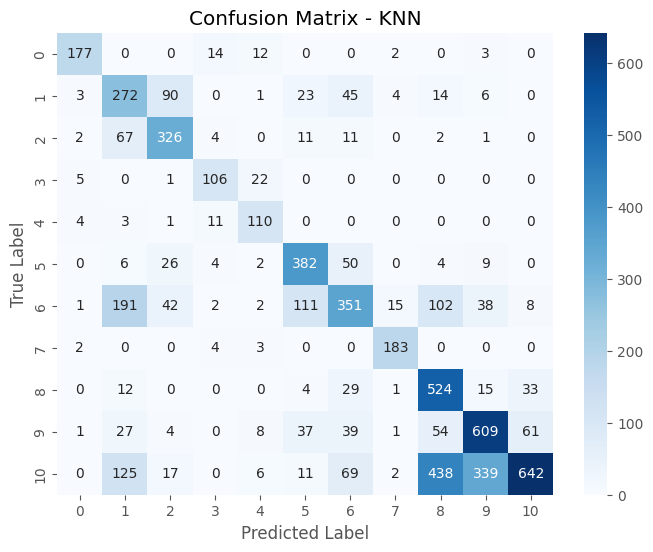

In [50]:
# KNN
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_overall_acc = 0
best_k = None
best_model = None
best_preds, best_labels = None, None

# Training loop
fold = 1
for train_idx, val_idx in skf.split(X_scaled, y_cleaned):  # Using y_cleaned as the target variable
    print(f"\n--- Fold {fold} ---")
    x_train_fold, x_val_fold = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_idx], y_cleaned.iloc[val_idx]

    # Handle imbalance with SMOTE
    smote = SMOTE(random_state=42)
    x_train_res, y_train_res = smote.fit_resample(x_train_fold, y_train_fold)

    # Try different k values
    for k in range(5, 21):  # Try k from 5 to 20
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_res, y_train_res)  # Removed sample_weight as KNN doesn't support it
        val_preds = knn.predict(x_val_fold)
        val_accuracy = np.mean(val_preds == y_val_fold)
        print(f"K = {k}, Validation Accuracy = {val_accuracy:.4f}")

        if val_accuracy > best_overall_acc:
            best_overall_acc = val_accuracy
            best_k = k
            best_model = knn
            best_preds = val_preds
            best_labels = y_val_fold

    fold += 1

# Final evaluation
print("\nKNN Model Evaluation:")
print(f"Best k: {best_k}")
way.append(f'KNN Model with k={best_k}')
print(f"Best Validation Accuracy: {best_overall_acc:.4f}")
best_acc.append(round(best_overall_acc, 4))
print("Classification Report:")
print(classification_report(best_labels, best_preds))

report = classification_report(best_labels, best_preds, target_names=target_names, output_dict=True)
# For macro-average scores
precision.append(round(report['macro avg']['precision'],4))
recall.append(round(report['macro avg']['recall'],4))
f1_score.append(round(report['macro avg']['f1-score'],4))

print("Confusion Matrix:")
cm = confusion_matrix(best_labels, best_preds)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_cleaned), yticklabels=np.unique(y_cleaned))
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<h2>Perceptron Polynomial Model</h2>


--- Fold 1 ---
Degree = 1, Fold 1, Validation Accuracy = 0.5189
Degree = 2, Fold 1, Validation Accuracy = 0.6749
Degree = 3, Fold 1, Validation Accuracy = 0.6811

--- Fold 2 ---
Degree = 1, Fold 2, Validation Accuracy = 0.5016
Degree = 2, Fold 2, Validation Accuracy = 0.6716
Degree = 3, Fold 2, Validation Accuracy = 0.6664

--- Fold 3 ---
Degree = 1, Fold 3, Validation Accuracy = 0.5017
Degree = 2, Fold 3, Validation Accuracy = 0.6796
Degree = 3, Fold 3, Validation Accuracy = 0.6789

Best Validation Accuracy across all folds: 0.6811

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       208
           1       0.42      0.59      0.49       458
           2       0.67      0.73      0.70       424
           3       0.79      0.80      0.80       134
           4       0.74      0.86      0.80       129
           5       0.68      0.70      0.69       483
           6       0.56      0.49      0.52       863
   

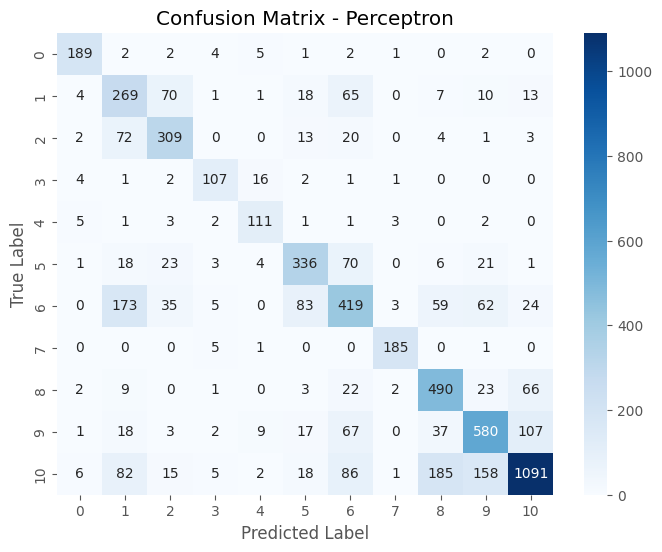

In [51]:
# PERCEPTRON WITH POLYNOMIAL FEATURES
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_overall_acc = 0
best_preds, best_labels = None, None
best_degree = None
best_model = None

fold = 1
for train_idx, val_idx in skf.split(X_scaled, y_cleaned):
    print(f"\n--- Fold {fold} ---")
    x_train_fold, x_val_fold = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_idx], y_cleaned.iloc[val_idx]

    # SMOTE for imbalance
    smote = SMOTE(random_state=42)
    x_train_res, y_train_res = smote.fit_resample(x_train_fold, y_train_fold)

    # Try polynomial degrees
    for degree in range(1, 4):  # Degrees 1 to 3
        poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
        x_train_poly = poly.fit_transform(x_train_res)
        x_val_poly = poly.transform(x_val_fold)

        # Train Perceptron
        perceptron = Perceptron(max_iter=1000, eta0=1.0, class_weight='balanced', random_state=42)
        perceptron.fit(x_train_poly, y_train_res)

        # Predict
        val_preds = perceptron.predict(x_val_poly)
        val_accuracy = np.mean(val_preds == y_val_fold)
        print(f"Degree = {degree}, Fold {fold}, Validation Accuracy = {val_accuracy:.4f}")

        if val_accuracy > best_overall_acc:
            best_overall_acc = val_accuracy
            best_preds = val_preds
            best_labels = y_val_fold
            best_degree = degree
            best_model = perceptron

    fold += 1

# Final metrics
way.append(f'Perceptron PolynomialDeg={best_degree}')
print("\nBest Validation Accuracy across all folds:", round(best_overall_acc, 4))
best_acc.append(round(best_overall_acc, 4))
print("\nClassification Report:")
print(classification_report(best_labels, best_preds, target_names=target_names))

report = classification_report(best_labels, best_preds, target_names=target_names, output_dict=True)
# For macro-average scores
precision.append(round(report['macro avg']['precision'],4))
recall.append(round(report['macro avg']['recall'],4))
f1_score.append(round(report['macro avg']['f1-score'],4))

# Confusion Matrix
cm = confusion_matrix(best_labels, best_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Perceptron')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [52]:
print(way,best_acc)

['NeuralNetwork (sigmoid)', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM Classifier rbf kernel', 'KNN Model with k=19', 'Perceptron PolynomialDeg=3'] [0.8095, 0.7255, 0.6956, 0.8255, 0.8046, 0.822, 0.6138, 0.6811]


<h2>Evaluation metrics in results_df</h2>

In [53]:
results_df = pd.DataFrame({
    'Model': way,
    'Best Validation Accuracy': best_acc,
    'precision':precision,
    'recall':recall,
    'f1_score':f1_score
})

# Optional: sort by accuracy for better presentation
results_df = results_df.sort_values(by='Best Validation Accuracy', ascending=False).reset_index(drop=True)
results_df.index = results_df.index + 1
# Display the DataFrame
print(results_df)

                        Model  Best Validation Accuracy  precision  recall  \
1               Random Forest                    0.8255     0.8717  0.8781   
2   SVM Classifier rbf kernel                    0.8220     0.8669  0.8744   
3     NeuralNetwork (sigmoid)                    0.8095     0.8453  0.8670   
4               Decision Tree                    0.8046     0.8482  0.8533   
5         Logistic Regression                    0.7255     0.7727  0.7929   
6                 Naive Bayes                    0.6956     0.7583  0.7757   
7  Perceptron PolynomialDeg=3                    0.6811     0.7111  0.7430   
8         KNN Model with k=19                    0.6138     0.6711  0.7245   

   f1_score  
1    0.8738  
2    0.8643  
3    0.8510  
4    0.8498  
5    0.7805  
6    0.7605  
7    0.7231  
8    0.6779  


In [54]:
results_df

,Model,Best Validation Accuracy,precision,recall,f1_score
1,Random Forest,0.8255,0.8717,0.8781,0.8738
2,SVM Classifier rbf kernel,0.8220,0.8669,0.8744,0.8643
3,NeuralNetwork (sigmoid),0.8095,0.8453,0.8670,0.8510
4,Decision Tree,0.8046,0.8482,0.8533,0.8498
5,Logistic Regression,0.7255,0.7727,0.7929,0.7805
6,Naive Bayes,0.6956,0.7583,0.7757,0.7605
7,Perceptron PolynomialDeg=3,0.6811,0.7111,0.7430,0.7231
8,KNN Model with k=19,0.6138,0.6711,0.7245,0.6779


In [55]:

y_pred = best_model_cls.predict(X_test_scaled)

# Define class names based on submission format
class_names = [
    "Acoustic/Folk_0", "Alt_Music_1", "Blues_2", "Bollywood_3", "Country_4",
    "HipHop_5", "Indie Alt_6", "Instrumental_7", "Metal_8", "Pop_9", "Rock_10"
]

# One-hot encode predictions
submission_df = pd.DataFrame(0, index=np.arange(len(y_pred)), columns=class_names)
for idx, label in enumerate(y_pred):
    submission_df.iloc[idx, label] = 1

# Step 5: Save to CSV
submission_df.to_csv("submission.csv", index=False)

In [56]:
print("submission.csv Created")

submission.csv Created
